# **MIE368: Analytics in Action**
### **Project: Maternal Mortality Intervention within Impoverished States**

***Group 7: Jina Yazdanpanah, Nada Aker, Raissa Amuruz, Kaan Kanatli, Doruk Kasimoglu***


# 1. Initial Setup

## 1.1 Importing Packages

In [ ]:
import matplotlib.pyplot as plt  # Most common visualization package that a lot of others are based on
import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer  # Specific function from common machine learning package
import numpy as np  # Common package for numerical methods
import pandas as pd  # Common package for data storeage/manipulation
import seaborn as sns  # Common package for statistical visualizations
#from google.colab import drive
#drive.mount('/content/drive')

## 1.2 Importing CSV Files

In [ ]:
##Import each of the csv data files that comprise the prediction and target variables:

data_1 = pd.read_csv('https://docs.google.com/uc?export=download&id=1wYF1B4NsUFF5dYyUoZDzT2LduWQhbVAF', header=None)
data_2 = pd.read_csv('https://docs.google.com/uc?export=download&id=13-r2aHKS93vCk2H15apYiKmTSOXSom4s', header=None)
#data_3 = pd.read_csv('https://docs.google.com/uc?export=download&id=1KMDJzm-xXFuRxfkA9zQ19Tejrc635CG0', header=None)
data_4 = pd.read_csv('https://docs.google.com/uc?export=download&id=1oMCFnq7OWFHlcC5wjFeLoytkEbCgwV3h', header=None)

#data_5 = pd.read_csv('https://docs.google.com/uc?export=download&id=1-_tEWKMiVtkyzcngip-6CGLqQFcr0FU8', header=None)
#not using this data set right now, waiting to see what final data frame looks like

data_6 = pd.read_csv('https://docs.google.com/uc?export=download&id=13VFWtTQemJsKe04ZNcuVvuq9pCfJby3l', header=None)
data_7 = pd.read_csv('https://docs.google.com/uc?export=download&id=1s5xYXIwR5qRvaUBIMGZ6OX9lBjtfQ8m_', header=None)
data_8 = pd.read_csv('https://docs.google.com/uc?export=download&id=12t-saeR8Wt0_u1AN6cEJ8AllbEFPe_19', header=None)
data_9 = pd.read_csv('https://docs.google.com/uc?export=download&id=1CYOQv0BSPfQiN8h34PdCU3tmfVU9UWMp', header=None)
data_target = pd.read_csv('https://docs.google.com/uc?export=download&id=1OeJ8wEmphF1PvennhUqRw8zOVq-0YDv2', header=None)


## 1.3 Analyzing Dataset Characteristics

In [ ]:
#Analyzing the state of each data set to understand how best to combine into one dataframe

data_list = [data_1,data_2,data_4,data_6,data_7,data_8,data_9,data_target]
index=0
for i in data_list:

    print(i.columns) #returns the column labels
    print(i.size) #Assessing the number of entries in each set
    print(i.dtypes) #Assessing the data types in each dataframe
    print(i.head()) #Assessing the format of the dataframes


Int64Index([0, 1, 2], dtype='int64')
2274
0    object
1    object
2    object
dtype: object
             0           1                                                  2
0      Country        Year  Antenatal care coverage - at least four visits...
1  Afghanistan   2016-2018                                               20.9
2  Afghanistan   2011-2017                                               16.3
3  Afghanistan   2010-2015                                               17.8
4  Afghanistan   2009-2014                                               22.7
Int64Index([0, 1, 2], dtype='int64')
525
0    object
1    object
2    object
dtype: object
             0           1                                2
0      Country        Year  Births by caesarean section (%)
1  Afghanistan   2010-2015                              2.7
2      Albania        2013                             34.1
3      Algeria   2010-2013                             16.0
4       Angola   2010-2016                       

##1.4 Data Cleaning

In [ ]:
'''
    This for loop goes over the dataframes and adjusts the index and column names
'''
index=0
new_data_list=[]
for i in data_list:
    column_names = i.loc[0] #retrieves the names we want to save as the columns
    new=column_names.to_numpy()
    i = i.drop(0, axis=0) #drop the column which holds the names
    i = i.reset_index(drop=True)
    i.columns = new #set columns to name labels
    i['Year'] = i['Year'].astype(str)
    i['Country'] = i['Country'].astype(str)
    new_data_list.append(i)
    print('Table index and shape:', index, new_data_list[index].shape ,"\n\n", new_data_list[index].head(),"\n") #Assessing the format of the dataframes
    index+=1
#print(new_data_list)



Table index and shape: 0 (757, 3) 

        Country        Year Antenatal care coverage - at least four visits (%)
0  Afghanistan   2016-2018                                               20.9
1  Afghanistan   2011-2017                                               16.3
2  Afghanistan   2010-2015                                               17.8
3  Afghanistan   2009-2014                                               22.7
4  Afghanistan   2006-2012                                                9.9 

Table index and shape: 1 (174, 3) 

        Country        Year Births by caesarean section (%)
0  Afghanistan   2010-2015                             2.7
1      Albania        2013                            34.1
2      Algeria   2010-2013                            16.0
3       Angola   2010-2016                             3.7
4    Argentina        2011                            29.1 

Table index and shape: 2 (1711, 3) 

        Country  ... Institutional Births (birth taken place in

In [ ]:
antenatal_care = new_data_list[0].copy()
c_section = new_data_list[1].copy()
instit_birth = new_data_list[2].copy()
mutilation = new_data_list[3].copy()
fam_planning =new_data_list[4].copy()
health_personnel =new_data_list[5].copy()
teen_birth = new_data_list[6].copy()
maternal_deaths= new_data_list[7].copy()


## 1.5 Adjusting Data Types



>> Maternal Deaths:



In [ ]:
maternal_deaths= maternal_deaths.drop(['Number of maternal deaths'],axis=1)
for i in range(len(maternal_deaths)):
    maternal_deaths['Maternal mortality ratio (per 100 000 live births)'].iloc[i] = maternal_deaths['Maternal mortality ratio (per 100 000 live births)'].iloc[i].split(" ")[0]
    maternal_deaths['Maternal mortality ratio (per 100 000 live births)'].iloc[i] = int(maternal_deaths['Maternal mortality ratio (per 100 000 live births)'].iloc[i]) /1000

maternal_deaths.columns = ['Country','Year','Maternal Mortality Ratio (%)']


>> Teen Birth:

In [ ]:
for i in range(len(teen_birth)):
    teen_birth.iloc[i,2] = float(teen_birth.iloc[i,2])/10
    #print(teen_birth.iloc[i,2])
    # if isinstance(teen_birth.iloc[row,1], str):
    #     teen_birth.iloc[row,1] = int(teen_birth.iloc[row,1])
teen_birth.columns = ['Country','Year','Adolescent birth rate (women aged 15-19) (%)']

teen_birth.head(7)


,Country,Year,Adolescent birth rate (women aged 15-19) (%)
0,Afghanistan,2017,6.2
1,Afghanistan,2014,7.72
2,Afghanistan,2013,8.7
3,Afghanistan,2011,12.57
4,Afghanistan,2009,8
5,Afghanistan,2008,9
6,Afghanistan,2007,10.3




>> Genital Mutilation:












In [ ]:

#loop over rows
for row in range(len(mutilation)):
    #access the third column,  split at space, access array at index 0
    mutilation.iloc[row,2] = mutilation.iloc[row,2].split(' ')[0]

mutilation.head()

,Country,Year,Proportion of girls and women aged 15-49 years who have undergone female genital mutilation/cutting (FMG/C) (%)
0,Benin,2014,9.2
1,Burkina Faso,2010,75.8
2,Cameroon,2004,1.4
3,Central African Republic,2010,24.2
4,Chad,2014-2015,38.4


>> Health Personnel:


In [ ]:
#loop over rows
for row in range(len(health_personnel)):
    #access the third column,  split at space, access array at index 0
    if isinstance(health_personnel.iloc[row,2], str):
        health_personnel.iloc[row,2] = health_personnel.iloc[row,2].split(' ')[0]
    # if isinstance(health_personnel.iloc[row,1], str):
    #     health_personnel.iloc[row,1] = int(health_personnel.iloc[row,1])

In [ ]:
health_personnel.head()
health_personnel.dtypes

Country                                            object
Year                                               object
Births attended by skilled health personnel (%)    object
dtype: object

>> C Section:

In [ ]:
for row in range(len(c_section)):
    #access the third column,  split at space, access array at index 0
    if isinstance(c_section.iloc[row,2], str):
        c_section.iloc[row,2] = c_section.iloc[row,2].split(' ')[0]
    # if isinstance(c_section.iloc[row,1], str):
    #     c_section.iloc[row,1] = int(c_section.iloc[row,1])
c_section.head()

,Country,Year,Births by caesarean section (%)
0,Afghanistan,2010-2015,2.7
1,Albania,2013,34.1
2,Algeria,2010-2013,16.0
3,Angola,2010-2016,3.7
4,Argentina,2011,29.1


>>Institutional Health Care:

In [ ]:
for row in range(len(instit_birth)):
    #access the third column,  split at space, access array at index 0
    if isinstance(instit_birth.iloc[row,2], str):
        instit_birth.iloc[row,2] = instit_birth.iloc[row,2].split(' ')[0]
    # if isinstance(instit_birth.iloc[row,1], str):
    #     instit_birth.iloc[row,1] = int(instit_birth.iloc[row,1])
instit_birth.head()

,Country,Year,Institutional Births (birth taken place in a facility) (%)
0,Afghanistan,2016-2018,56.3
1,Afghanistan,2011-2017,50.5
2,Afghanistan,2010-2015,48.1
3,Afghanistan,2008-2014,42.8
4,Afghanistan,2006-2012,36.0


>> Family Planning:

In [ ]:
fam_planning = fam_planning.drop(['Married or in-union women of reproductive age who have their need for family planning satisfied with modern methods (%)'], axis=1)

for row in range(len(fam_planning)):
    #access the third column,  split at space, access array at index 0
    if isinstance(fam_planning.iloc[row,2], str):
        fam_planning.iloc[row,2] = fam_planning.iloc[row,2].split(' ')[0]

fam_planning.head()

,Country,Year,Women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (%)
0,Afghanistan,2016,42.2
1,Albania,2018,6.3
2,Albania,2009,13.9
3,Algeria,2013,74.7
4,Algeria,2006,74.7


>> Antenatal Coverage:


In [ ]:
for row in range(len(antenatal_care)):
    #access the third column,  split at space, access array at index 0
    if isinstance(antenatal_care.iloc[row,2], str):
        antenatal_care.iloc[row,2] = antenatal_care.iloc[row,2].split(' ')[0]
antenatal_care.head()


,Country,Year,Antenatal care coverage - at least four visits (%)
0,Afghanistan,2016-2018,20.9
1,Afghanistan,2011-2017,16.3
2,Afghanistan,2010-2015,17.8
3,Afghanistan,2009-2014,22.7
4,Afghanistan,2006-2012,9.9


# 2. Feature Engineering

## 2.1 Split Years Function

In [ ]:
  #This Function goes through a data frame and splits the year intervals into individual entries for each year
  #The data for each year in the interval is then stored as identical

  def split_years(df):
    df_copy = df.copy()
    final_df = pd.DataFrame(columns=df.columns)

    #iterate over rows
    for i in range(len(df)):
        #split year
        if ('-' in str(df.Year.iloc[i])):               #if there is a time interval

            year_list = df.Year.iloc[i].split('-')      #[StartYear,EndYear]
            start_year = int(year_list[0])
            end_year = int(year_list[1])

            year_range = (end_year - start_year)

            year_span=[start_year]
            num = start_year

            for _ in range(year_range):
                num = num + 1
                year_span.append(num)


            columns_index=[]
            for j in range(len(df.columns)):
                columns_index.append(j)

            columns_index.remove(1)

            cols = []

            for k in columns_index:
                cols.append((df.iloc[i])[k])

            for z in year_span:
                new_row = [cols[0],z,cols[1]]

                if len(cols) > 2:
                    new_row.append(cols[2:])


                df_copy.loc[i] = new_row
                df_copy.index=df_copy.index+1
                df_copy = df_copy.sort_index()

    for k in range(len(df_copy)):
        if ('-' not in str(df_copy.Year.iloc[k])):
            final_df = final_df.append(df_copy.iloc[k])


    final_df = final_df.sort_values(['Country','Year'])

    final_df.reset_index(drop = True, inplace = True)



    return final_df


>> Split Years function is run on each dataframe:

In [ ]:
#NEW LIST OF DFS
processed_df_list = [antenatal_care,c_section, instit_birth, mutilation, fam_planning, health_personnel, teen_birth, maternal_deaths]
split_data = []
#for loop to split years
for df in processed_df_list:
    split_data.append(split_years(df))


In [ ]:
for df in split_data:
  print(df.head())
  df.iloc[:,2] = df.iloc[:,2].astype(float)

       Country  Year Antenatal care coverage - at least four visits (%)
0  Afghanistan  2005                                               16.1
1  Afghanistan  2006                                               16.1
2  Afghanistan  2006                                                9.9
3  Afghanistan  2007                                               16.1
4  Afghanistan  2007                                                9.9
       Country   Year Births by caesarean section (%)
0  Afghanistan   2010                             2.7
1  Afghanistan   2011                             2.7
2  Afghanistan   2012                             2.7
3  Afghanistan   2013                             2.7
4      Albania   2013                            34.1
       Country  Year Institutional Births (birth taken place in a facility) (%)
0  Afghanistan  2006                                               36.0        
1  Afghanistan  2007                                               36.0        
2  A

>> Then entries that have the same country and year combination are evaluated and only the mean of the data is stored as 1 entry:

In [ ]:
#SCRIPT TO GET RID OF DUPLICATE COUNTRY + YEAR ROWS AND REPLACE THE VALUE WITH THE MEAN OF THE VALUE

clean_average_df=[]
for df in split_data:
    x = df.groupby(['Country','Year']).mean()
    x.reset_index(inplace=True)
    clean_average_df.append(x)


antenatal_care = clean_average_df[0]
c_section = clean_average_df[1]
instit_birth = clean_average_df[2]
mutilation = clean_average_df[3]
fam_planning= clean_average_df[4]
health_personnel= clean_average_df[5]
teen_birth = clean_average_df[6]
maternal_deaths= clean_average_df[7]


>> Assessing the shape of each dataset after the split years function:

In [ ]:
#ASSESSING THE SIZE OF EACH CLEANED DATA SET

print("Antenatal Coverage DataSet Shape: "+str(antenatal_care.shape))
print("Ceserean Section DataSet Shape: "+str(c_section.shape)) #this one potentially should be deleted
print("Institiutional Births DataSet Shape: "+ str(instit_birth.shape))
print("Genital Mutilation DataSet Shape: "+str(mutilation.shape)) #i think we should get rid of this one because it only has 27 entries !!!!!!!
print("Family Planning DataSet Shape: "+ str(fam_planning.shape)) #this one potentialy deleted
print("Attendance of Skilled Personal DataSet Shape: "+ str(health_personnel.shape))
print("Adolescent Births DataSet Shape: "+ str(teen_birth.shape))
print("Maternal Mortality DataSet Shape: "+ str(maternal_deaths.shape))


Antenatal Coverage DataSet Shape: (1832, 3)
Ceserean Section DataSet Shape: (405, 3)
Institiutional Births DataSet Shape: (2165, 3)
Genital Mutilation DataSet Shape: (27, 3)
Family Planning DataSet Shape: (387, 3)
Attendance of Skilled Personal DataSet Shape: (1755, 3)
Adolescent Births DataSet Shape: (2189, 3)
Maternal Mortality DataSet Shape: (3294, 3)


## 2.2 Combining Datasets

In [ ]:
#combine the datasets here
from functools import reduce

#get rid of the three smallest data sets
df_nosmalldata = [antenatal_care,instit_birth,health_personnel,teen_birth,maternal_deaths]

#combine all data sets
df_merged_4 = reduce(lambda  left,right: pd.merge_ordered(left,right,on=['Country','Year'],how="outer"), df_nosmalldata)

#converted year from string into an int
df_merged_4['Year'] = df_merged_4['Year'].map(lambda x: int(x))

df_merged_4_sorted = df_merged_4.sort_values(by=['Country','Year'])
df_merged_4_sorted.reset_index(inplace=True,drop=True)
df_merged_4_sorted.head()

#Clean remaining duplicate rows by taking the mean of the values
#NaN's are disregarded with this technique
df_merged_4_clean = df_merged_4_sorted.groupby(['Country','Year'],as_index=False).aggregate(np.mean)
df_merged_4_final = df_merged_4_clean.copy()

df_merged_4_final.to_csv("data_merged_4.csv")
df_merged_4_final.describe()

,Year,Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
count,4275.000000,1828.000000,2146.000000,1755.000000,2189.000000,3294.000000
mean,2006.174737,63.952212,80.402147,92.137892,4.343751,0.167953
std,7.549253,24.572511,25.143448,16.537967,4.096406,0.229769
min,1985.000000,5.800000,4.100000,6.000000,0.000000,0.001000
25%,2001.000000,47.650000,64.650000,95.500000,1.290000,0.012000
50%,2007.000000,66.800000,95.800000,99.000000,2.820000,0.055000
75%,2012.000000,84.825000,99.200000,100.000000,6.270000,0.239750
max,2019.000000,100.000000,100.000000,100.000000,22.900000,0.996000


>> The intial method we tried, this method did not work:

In [ ]:
# def isNaN(num):
#     return num != num

In [ ]:
# #combine the datasets here
# from functools import reduce

# df_nosmalldata = [antenatal_care,instit_birth,health_personnel,teen_birth,maternal_deaths] #get rid of the three smallest data sets

# #converted year from string into an int
# df_merged_fill['Year'] = df_merged_fill['Year'].map(lambda x: int(x))

# ##PROBLEM WITH MAX STARTS HERE
# #converted nans to 0
# new_df = df_merged_fill.applymap(lambda x: 0 if (isNaN(x)) else x)
# new_df.head()
# new_df.to_csv("new_df.csv")

# new_df = df_merged_fill.sort_values(by=['Country','Year'])
# new_df.reset_index(inplace=True,drop=True)
# new_df.describe()


# 3. EDA

## 3.1 Imputing Missing Data

In [ ]:
print(df_merged_4_final.isnull().sum().sum(), '\n', df_merged_4_final.shape)
#df_merged_4_final.head()
df_merged_4_final.groupby('Country').count().sort_values('Year')
#df_merged_4_final.to_csv("presentation.csv")
#df_merged_4_final.head(4285)

len(df_merged_4)


10163 
 (4275, 7)


5402

In [ ]:
#Assesing the impact of different thresholds for max number of NaN's in a row:

nan_df_rsn =df_merged_4_final.copy()

no_nans_2 = nan_df_rsn.dropna(axis=0, thresh=2)
print("threshold = 2", no_nans_2.shape)

no_nans_3 = nan_df_rsn.dropna(axis=0, thresh=3)
print("threshold = 3", no_nans_3.shape)

no_nans_4 = nan_df_rsn.dropna(axis=0, thresh=4)
print("threshold = 4", no_nans_4.shape)

no_nans_5 = nan_df_rsn.dropna(axis=0, thresh=5)
print("threshold = 5", no_nans_5.shape)

print("we chose threshold =4",no_nans_4.shape)
no_nans_4.to_csv("no_nans.csv")
no_nans_4.head()
no_nans_df = no_nans_4.copy()

threshold = 2 (4275, 7)
threshold = 3 (4275, 7)
threshold = 4 (3283, 7)
threshold = 5 (2138, 7)
we chose threshold =4 (3283, 7)


In [ ]:
#finding number of nans in no nans df
nap= no_nans_4.isna().sum().sum()
na = no_nans_4.count().sum()
total = nap/na
print('na4', nap)
print('na', na)
print('percentage',total)
red_nan = nan_df_rsn.isna().sum().sum()
print('total reduced', (red_nan - nap)/red_nan)

na4 6195
na 16786
percentage 0.36905754795663054
total reduced 0.3904358949129194


In [ ]:
#Now that the threshold is determined, we need to impute the data:

#IMPUTING BASED ON MEAN:
df_mean= no_nans_df.copy()

for col in df_mean.iloc[:,1:].columns:
    df_mean[col] =df_mean[col].fillna(df_mean.groupby('Country')[col].transform('mean'))

print(f'There are {df_mean.iloc[:,:].isna().sum().sum()} missing values.')

#filled out the rest of the missing values with the each column's mean
df_mean=df_mean.fillna(df_mean.mean())
print(f'There are {df_mean.iloc[:,:].isna().sum().sum()} missing values.')

df_mean.to_csv("mean_df.csv")
df_mean.head()


There are 1608 missing values.
There are 0 missing values.


,Country,Year,Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
0,Afghanistan,2000,16.546154,44.740278,39.428571,19.38,0.001
3,Afghanistan,2003,16.546154,44.740278,14.000000,15.18,0.001
5,Afghanistan,2005,16.100000,44.740278,39.428571,11.74,0.001
6,Afghanistan,2006,13.000000,36.000000,39.428571,12.62,0.001
7,Afghanistan,2007,13.000000,36.000000,39.428571,10.30,0.001


In [ ]:
# IMPUTING BASED ON MEDIAN:
df_median= no_nans_df.copy()

for col in df_median.iloc[:,1:].columns:
    df_median[col] =df_median[col].fillna(df_median.groupby('Country')[col].transform('median'))

print(f'There are {df_median.iloc[:,:].isna().sum().sum()} missing values.')

#filled out the rest of the missing values with the each column's mean
df_median=df_median.fillna(df_median.median())
print(f'There are {df_median.iloc[:,:].isna().sum().sum()} missing values.')

df_median.to_csv("median_df.csv")
df_median.head()


There are 1608 missing values.
There are 0 missing values.


,Country,Year,Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
0,Afghanistan,2000,16.3,45.741667,40.0,19.38,0.001
3,Afghanistan,2003,16.3,45.741667,14.0,15.18,0.001
5,Afghanistan,2005,16.1,45.741667,40.0,11.74,0.001
6,Afghanistan,2006,13.0,36.000000,40.0,12.62,0.001
7,Afghanistan,2007,13.0,36.000000,40.0,10.30,0.001


In [ ]:
df_median.iloc[:,2:].describe()

,Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,71.448216,83.422924,84.372373,5.595289,0.159683
std,20.564679,22.907883,21.674817,4.567549,0.218421
min,5.800000,4.100000,6.000000,0.070000,0.001000
25%,63.000000,74.450000,73.000000,1.795000,0.013000
50%,74.800000,95.100000,97.000000,4.500000,0.054500
75%,86.000000,98.700000,99.000000,8.470000,0.222000
max,100.000000,100.000000,100.000000,22.900000,0.996000


In [ ]:
df_mean.iloc[:,2:].describe()

,Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,70.389164,80.554042,83.771859,5.588586,0.161177
std,20.264253,21.962866,21.250666,4.567558,0.216609
min,5.800000,4.100000,6.000000,0.070000,0.001000
25%,62.800000,75.000000,74.000000,1.791500,0.013000
50%,70.389164,83.200000,96.000000,4.430000,0.056167
75%,86.200000,98.700000,99.166667,8.328000,0.225000
max,100.000000,100.000000,100.000000,22.900000,0.996000


>> Based on Analysis of the statistics gathered from df_mean and df_median, the method of mean is chosen for the final dataset:

In [ ]:
fdf = df_mean.copy()
fdf.reset_index(inplace=True, drop=True)
print(fdf.shape)
fdf.head()

(3283, 7)


,Country,Year,Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
0,Afghanistan,2000,16.546154,44.740278,39.428571,19.38,0.001
1,Afghanistan,2003,16.546154,44.740278,14.000000,15.18,0.001
2,Afghanistan,2005,16.100000,44.740278,39.428571,11.74,0.001
3,Afghanistan,2006,13.000000,36.000000,39.428571,12.62,0.001
4,Afghanistan,2007,13.000000,36.000000,39.428571,10.30,0.001


## 3.2 Analytical Insight

In [ ]:
#SPLIT INTO TRAINING AND TESTING SET, WE COMPLETE THE REST OF EDA ON ONLY THE TRAINING SET:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fdf.drop('Maternal Mortality Ratio (%)',1),  # all X data
                                                    fdf['Maternal Mortality Ratio (%)'],  # All y data
                                                    test_size=0.30,  # Fraction of data in test set
                                                    shuffle=True,  # Randomly splits the data
                                                    random_state = 3  # Sets random seed for reproducability
                                                    )
print(X_train.shape)
print(X_test.shape)

(2298, 6)
(985, 6)


In [ ]:
#General EDA gathering:
fdf.iloc[:,2:].describe()

,Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,70.389164,80.554042,83.771859,5.588586,0.161177
std,20.264253,21.962866,21.250666,4.567558,0.216609
min,5.800000,4.100000,6.000000,0.070000,0.001000
25%,62.800000,75.000000,74.000000,1.791500,0.013000
50%,70.389164,83.200000,96.000000,4.430000,0.056167
75%,86.200000,98.700000,99.166667,8.328000,0.225000
max,100.000000,100.000000,100.000000,22.900000,0.996000


>>Group by Maximums

In [ ]:
max_col_index = fdf.iloc[:,2:].idxmax()
print('Max for each col\n\n', max_col_index)

antenatal_country = fdf.iloc[max_col_index[0]]
instit_country = fdf.iloc[max_col_index[1]]
health_personnel_country = fdf.iloc[max_col_index[2]]
teenbirth_country = fdf.iloc[max_col_index[3]]
mortality_average = fdf.iloc[:,6].mean()

print('\nAverage for Mortality Ratio is:', mortality_average)
print('Countries corresponding to the max value')

print('1) Country with max for antenatal care:',antenatal_country.iloc[0])
print('\tCorresponding Mortality Ratio',antenatal_country.iloc[6])

print('2) Country with max for instit health:',instit_country.iloc[0])
print('\tCorresponding Mortality Ratio',instit_country.iloc[6])


print('3) Country with max for health personnel:',health_personnel_country.iloc[0])
print('\tCorresponding Mortality Ratio',health_personnel_country.iloc[6])


print('4) Country with max for teen birth:',teenbirth_country.iloc[0])
print('\tCorresponding Mortality Ratio',teenbirth_country.iloc[6])


Max for each col

 Antenatal care coverage - at least four visits (%)              68
Institutional Births (birth taken place in a facility) (%)      59
Births attended by skilled health personnel (%)                 19
Adolescent birth rate (women aged 15-19) (%)                   571
Maternal Mortality Ratio (%)                                  2125
dtype: int64

Average for Mortality Ratio is: 0.1611766219766555
Countries corresponding to the max value
1) Country with max for antenatal care: Antigua and Barbuda
	Corresponding Mortality Ratio 0.044
2) Country with max for instit health: Antigua and Barbuda
	Corresponding Mortality Ratio 0.044
3) Country with max for health personnel: Albania
	Corresponding Mortality Ratio 0.022
4) Country with max for teen birth: Central African Republic
	Corresponding Mortality Ratio 0.001


>> Group by Country and Year

In [ ]:
df_country = fdf.groupby('Country')
print('Size: \n\n',df_country.size(),'\n')
print('Mean: \n\n',df_country.mean(),'\n')
print('Max: \n\n',df_country.max(),'\n')
print('Min: \n\n',df_country.min(),'\n')
print('Count: \n\n',df_country.count())

Size: 

 Country
Afghanistan                                                 15
Albania                                                     17
Algeria                                                     12
Andorra                                                      3
Angola                                                      12
                                                            ..
Viet Nam                                                    19
Yemen                                                       20
Zambia                                                      32
Zimbabwe                                                    26
occupied Palestinian territory, including east Jerusalem     3
Length: 192, dtype: int64 

Mean: 

                                                            Year  ...  Maternal Mortality Ratio (%)
Country                                                          ...                              
Afghanistan                                         200

In [ ]:
df_year = fdf.groupby('Year')
print('Size: \n\n',df_year.size(),'\n')
print('Mean: \n\n',df_year.mean(),'\n')
print('Max: \n\n',df_year.max(),'\n')
print('Min: \n\n',df_year.min(),'\n')
print('Count: \n\n',df_year.count())

Size: 

 Year
1985      2
1986      2
1987      8
1988     10
1989     12
1990     14
1991     17
1992     16
1993     19
1994     25
1995     34
1996     34
1997     32
1998     35
1999     37
2000    170
2001    160
2002    162
2003    165
2004    163
2005    171
2006    178
2007    173
2008    169
2009    175
2010    169
2011    165
2012    166
2013    163
2014    160
2015    151
2016    151
2017    136
2018     38
2019      1
dtype: int64 

Mean: 

       Antenatal care coverage - at least four visits (%)  ...  Maternal Mortality Ratio (%)
Year                                                      ...                              
1985                                          66.050000   ...                      0.087750
1986                                          66.050000   ...                      0.087750
1987                                          43.800000   ...                      0.381094
1988                                          41.330000   ...                     

## 3.3 Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


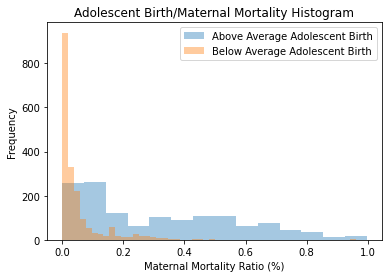

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


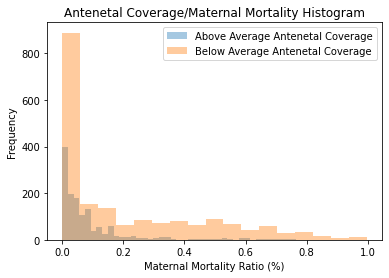

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


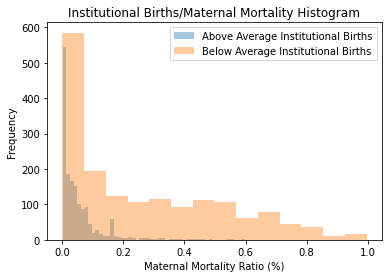

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


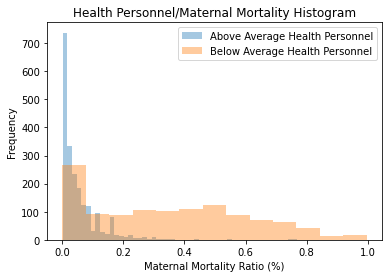

In [ ]:
#VISUALIZING THE DATA

#Adolescent Birth Rate
a_high_rate = fdf.loc[fdf.iloc[:,5]>5.595289]
a_low_rate = fdf.loc[fdf.iloc[:,5]<=5.595289]

sns.distplot(a_high_rate.iloc[:,6],kde=False,label='Above Average Adolescent Birth')
sns.distplot(a_low_rate.iloc[:,6],kde=False,label='Below Average Adolescent Birth')

plt.legend()
plt.title('Adolescent Birth/Maternal Mortality Histogram')
plt.ylabel('Frequency')
plt.show()

#Antenetal Coverage
aC_high_rate = fdf.loc[fdf.iloc[:,2]>71.518975]
aC_low_rate = fdf.loc[fdf.iloc[:,2]<=71.518975]

sns.distplot(aC_high_rate.iloc[:,6],kde=False,label='Above Average Antenetal Coverage')
sns.distplot(aC_low_rate.iloc[:,6],kde=False,label='Below Average Antenetal Coverage')

plt.legend()
plt.title('Antenetal Coverage/Maternal Mortality Histogram')
plt.ylabel('Frequency')
plt.show()

#Facility Related Births
fac_high_rate = fdf.loc[fdf.iloc[:,3]>83.936280]
fac_low_rate = fdf.loc[fdf.iloc[:,3]<=83.936280]

sns.distplot(fac_high_rate.iloc[:,6],kde=False,label='Above Average Institutional Births')
sns.distplot(fac_low_rate.iloc[:,6],kde=False,label='Below Average Institutional Births')

plt.legend()
plt.title('Institutional Births/Maternal Mortality Histogram')
plt.ylabel('Frequency')
plt.show()

#Health personnel attendence
heal_high_rate = fdf.loc[fdf.iloc[:,4]>84.372373]
heal_low_rate = fdf.loc[fdf.iloc[:,4]<=84.372373]

sns.distplot(heal_high_rate.iloc[:,6],kde=False,label='Above Average Health Personnel')
sns.distplot(heal_low_rate.iloc[:,6],kde=False,label='Below Average Health Personnel')

plt.legend()
plt.title('Health Personnel/Maternal Mortality Histogram')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


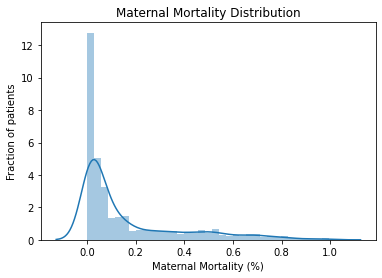

In [ ]:
sns.distplot(fdf.iloc[:,6], hist=True)
plt.title('Maternal Mortality Distribution')
plt.ylabel('Fraction of patients')
plt.xlabel('Maternal Mortality (%)')
plt.show()

                                                        Year  ...  Adolescent birth rate (women aged 15-19) (%)
Year                                                1.000000  ...                                     -0.160126
Antenatal care coverage - at least four visits (%)  0.221628  ...                                     -0.451392
Institutional Births (birth taken place in a fa...  0.276569  ...                                     -0.534511
Births attended by skilled health personnel (%)     0.109248  ...                                     -0.677322
Adolescent birth rate (women aged 15-19) (%)       -0.160126  ...                                      1.000000

[5 rows x 5 columns]


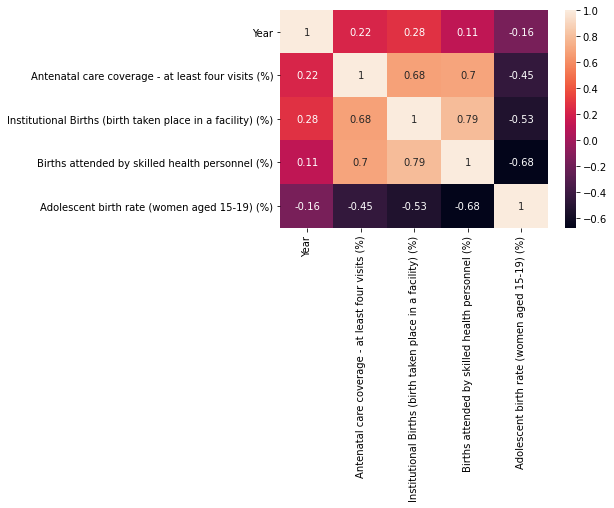

Births attended by skilled health personnel (%)               1
Institutional Births (birth taken place in a facility) (%)    1
Adolescent birth rate (women aged 15-19) (%)                  0
Antenatal care coverage - at least four visits (%)            0
Year                                                          0
dtype: int64


In [ ]:
#MAKE CORRELATION MATRIX (HEATMAP)

X_train_corr = X_train.corr()
print(X_train_corr)

sns.heatmap(X_train_corr,annot=True)
plt.show()

corr = X_train_corr.abs()
corr = corr[corr > 0.75]
print(corr.count().sort_values(ascending=False) - 1)


## 3.4 Initial Model: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X_train= X_train.drop(columns='Country')
X_test = X_test.drop(columns='Country')
linreg.fit(X_train, y_train)

# Partition the testing data into features and target

# Predict the number of wins
y_test_predictions = linreg.predict(X_test)

# Evaluate models
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

The train score is 0.556 and the test score is 0.568


# 4. Feature Engineering Extended

Given the amount of limitation created by the previous data analysis, the team has researched new features to include and analyze.

## 4.1 Adding New Features

In [ ]:
data_merged = pd.read_csv("https://docs.google.com/spreadsheets/d/1XvOl61zzPlyGgdw6Xa3DAjwkbSVXlfuTyROhrSQBxIs/gviz/tq?tqx=out:csv&sheet=merged_data", header=None)

data_merged.head()
data_merged = data_merged.drop(columns=0)
column_names = data_merged.iloc[0] #retrieves the names we want to save as the columns
new = column_names.to_numpy()
data_merged = data_merged.drop(0, axis=0) #drop the column which holds the names
data_merged.reset_index(drop=True, inplace=True)
data_merged.columns = new



data_merged.head()

,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP)
0,Aruba,2001,NaN,NaN,NaN
1,Aruba,2002,NaN,NaN,NaN
2,Aruba,2003,NaN,NaN,NaN
3,Aruba,2004,NaN,NaN,NaN
4,Aruba,2005,NaN,NaN,NaN


In [ ]:

print('shape:',data_merged.shape)
print('# of nans:\n',data_merged.isna().sum())


shape: (5016, 5)
# of nans:
 Country                                     0
Year                                        0
Prevalence of HIV (%)                    2396
Prevalence of Undernourishment (%)       1439
Current health expenditure (% of GDP)    1084
dtype: int64


In [ ]:
#data_merged.dtypes
data_merged.iloc[:,2] = data_merged.iloc[:,2].astype(float)
data_merged.iloc[:,3] = data_merged.iloc[:,3].astype(float)
data_merged.iloc[:,4] = data_merged.iloc[:,4].astype(float)
data_merged.iloc[:,1] = data_merged.iloc[:,1].astype(int)
data_merged.dtypes
#fdf.dtypes

Country                                   object
Year                                       int64
Prevalence of HIV (%)                    float64
Prevalence of Undernourishment (%)       float64
Current health expenditure (% of GDP)    float64
dtype: object

In [ ]:
final_merge = pd.merge_ordered(data_merged, fdf, on=['Country','Year'], how="inner")
final_merge.head()
final_merge.shape
final_merge.isna().sum()

Country                                                         0
Year                                                            0
Prevalence of HIV (%)                                         940
Prevalence of Undernourishment (%)                            372
Current health expenditure (% of GDP)                          96
Antenatal care coverage - at least four visits (%)              0
Institutional Births (birth taken place in a facility) (%)      0
Births attended by skilled health personnel (%)                 0
Adolescent birth rate (women aged 15-19) (%)                    0
Maternal Mortality Ratio (%)                                    0
dtype: int64

In [ ]:
final_merge.to_csv("final_merge.csv")

### Data Imputation

In [ ]:
fm= final_merge.copy()

# filled out missing values with each country's mean value

for col in fm.iloc[:,1:].columns:
    fm[col] =fm[col].fillna(fm.groupby('Country')[col].transform('mean'))

print(f'There are {fm.isna().sum().sum()} missing values.')
#filled out the rest of the missing values with the each column's mean
fm=fm.fillna(fm.mean())
print(f'There are {fm.isna().sum().sum()} missing values.')
fm.head(1000)
fm.to_csv("imputed.csv")
fm.head()


There are 1355 missing values.
There are 0 missing values.


,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
0,Afghanistan,2003,0.1,40.7,8.941258,16.546154,44.740278,14.000000,15.18,0.001
1,Afghanistan,2005,0.1,36.2,9.948289,16.100000,44.740278,39.428571,11.74,0.001
2,Afghanistan,2006,0.1,33.5,10.622766,13.000000,36.000000,39.428571,12.62,0.001
3,Afghanistan,2007,0.1,30.0,9.904674,13.000000,36.000000,39.428571,10.30,0.001
4,Afghanistan,2008,0.1,26.4,10.256495,13.533333,37.233333,39.428571,9.00,0.001


In [ ]:
fm.describe()

,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%)
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000
mean,2009.003663,1.418853,9.854743,6.390164,71.954551,82.836671,84.341006,5.279207,0.149321
std,4.884537,2.713072,9.382671,2.582106,18.698079,20.159467,21.312738,4.540857,0.212665
min,2001.000000,0.100000,2.500000,1.025159,6.300000,8.800000,6.000000,0.230000,0.001000
25%,2005.000000,0.100000,2.500000,4.404123,66.100000,80.554042,74.800000,1.540000,0.010000
50%,2009.000000,1.300000,7.600000,6.159476,70.389164,88.300000,97.000000,4.120000,0.046000
75%,2013.000000,1.418853,11.300000,8.255802,86.500000,98.850000,99.571429,7.840000,0.185000
max,2019.000000,24.100000,67.500000,21.614012,100.000000,100.000000,100.000000,22.900000,0.996000


## 4.2 Adding Categorical Data to describe data country of origin

In [ ]:
#income = pd.read_csv("https://docs.google.com/spreadsheets/d/18h8-IzUu5VYkNtDlkIfzqacFxFVGon4DjCgzCTSn_1M/gviz/tq?tqx=out:sheet=IncomeLevels", header=None)
income = pd.read_excel("https://docs.google.com/uc?export=download&id=1RFtyT9PeIpqJcVAaCf38p0_Rj0ORE4XH", header= None)

income = income.drop(columns=0)
column_names = income.iloc[0] #retrieves the names we want to save as the columns
new = column_names.to_numpy()
income = income.drop(0, axis=0) #drop the column which holds the names
income.reset_index(drop=True, inplace=True)
income.columns = new

income.head()

,Country,IncomeGroup,Income Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,Aruba,High income,3,0,0,1,0,0,0,0
1,Afghanistan,Low income,0,0,0,0,0,0,1,0
2,Angola,Lower middle income,1,0,0,0,0,0,0,1
3,Albania,Upper middle income,2,0,1,0,0,0,0,0
4,Andorra,High income,3,0,1,0,0,0,0,0


In [ ]:
income_mortality = pd.merge(fm, income, on=['Country'], how="inner")
income_mortality.head()
income_mortality.shape
income_mortality=income_mortality.drop(columns=['IncomeGroup'])
df_pre_cart = income_mortality.copy()
df_pre_cart.shape
df_pre_cart.head()

,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%),Income Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,Afghanistan,2003,0.1,40.7,8.941258,16.546154,44.740278,14.000000,15.18,0.001,0,0,0,0,0,0,1,0
1,Afghanistan,2005,0.1,36.2,9.948289,16.100000,44.740278,39.428571,11.74,0.001,0,0,0,0,0,0,1,0
2,Afghanistan,2006,0.1,33.5,10.622766,13.000000,36.000000,39.428571,12.62,0.001,0,0,0,0,0,0,1,0
3,Afghanistan,2007,0.1,30.0,9.904674,13.000000,36.000000,39.428571,10.30,0.001,0,0,0,0,0,0,1,0
4,Afghanistan,2008,0.1,26.4,10.256495,13.533333,37.233333,39.428571,9.00,0.001,0,0,0,0,0,0,1,0


## 4.3 CART Model for Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pre_cart.drop(columns=['Maternal Mortality Ratio (%)'],axis=1),  # all X data
                                                    df_pre_cart['Maternal Mortality Ratio (%)'],  # All y data
                                                    test_size=0.4,  # Fraction of data in test set
                                                    shuffle=True,  # Randomly splits the data
                                                    random_state = 3  # Sets random seed for reproducability
                                                    )
print('training:',X_train.shape)
print('testing:', X_test.shape)

training: (1467, 17)
testing: (978, 17)


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X_train= X_train.drop(columns='Country')
X_test = X_test.drop(columns='Country')
linreg.fit(X_train, y_train)

# Predict the number of wins
y_test_predictions = linreg.predict(X_test)

# Evaluate models
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

The train score is 0.664 and the test score is 0.632


The score of this model over training data is 0.716 and 0.701 over the testing data


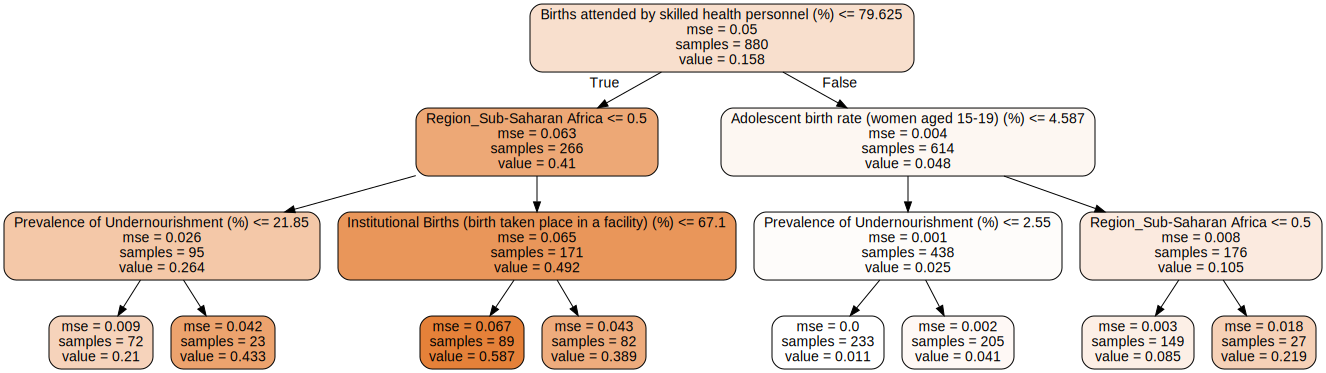

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn.model_selection import train_test_split

#THIS CART ASSESMENT IS ONLY PERFORMED ON THE X_TRAIN DATA IN ORDER TO MAINTAIN INTEGRETIY AND LIMIT DATA SPILLAGE:

X_train_cart, X_test_cart, y_train_cart, y_test_cart = train_test_split(X_train,  # all X data
                                                    y_train,  # All y data
                                                    test_size=0.4,  # Fraction of data in test set
                                                    shuffle=True,  # Randomly splits the data
                                                    random_state = 3  # Sets random seed for reproducability
                                                    )

# Train the CART model

#depths = [3,4,5,6,7,8,9,10]
#leaf = [3,4,5,6,7,8,9,10]

#for i in depths:
    #for j in leaf:

cart_model = DecisionTreeRegressor(  random_state=1, max_depth=3, min_samples_leaf=4)
cart_model.fit(X_train_cart, y_train_cart)
train_score = cart_model.score(X_train_cart, y_train_cart)
test_score = cart_model.score(X_test_cart, y_test_cart)

# Print out summary of model performance
        #print('Max_Depth: ',i,'Min_Samples_Leaf',j,':\n')
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))
        #print('\n')

# Visualize the decision tree
cart_graph = Source(export_graphviz(cart_model,
                    feature_names = X_train.columns,
                    rounded = True, proportion = False,
                    filled = True))
SVG(cart_graph.pipe(format='svg'))

In [ ]:
from google.colab import files
plt.savefig('cart_graph')
files.download('cart_graph')

FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
#Assess relative importance of features for the CART model

df1 = X_train
list1 = list(df1.columns)
list2 = list(cart_model.feature_importances_)
data = {'x': list1, 'y': list2}
gini = pd.DataFrame(data, columns = ['x','y'])
gini = gini.sort_values(by= 'y')
print(gini)

print(cart_model.feature_importances_)

                                                    x         y
0                                                Year  0.000000
1                               Prevalence of HIV (%)  0.000000
3               Current health expenditure (% of GDP)  0.000000
4   Antenatal care coverage - at least four visits...  0.000000
8                                         Income Code  0.000000
9                          Region_East Asia & Pacific  0.000000
10                       Region_Europe & Central Asia  0.000000
11                   Region_Latin America & Caribbean  0.000000
12                  Region_Middle East & North Africa  0.000000
13                               Region_North America  0.000000
14                                  Region_South Asia  0.000000
7        Adolescent birth rate (women aged 15-19) (%)  0.025731
2                  Prevalence of Undernourishment (%)  0.030688
5   Institutional Births (birth taken place in a f...  0.052869
15                          Region_Sub-S

>> Adding the CART conditions as features in the dataframe:

In [ ]:
#Add the CART conditions as new features in model:
#this has format: df <= threshold (le)

#for greater than or equal to use ge
#for greater than use gt
#for less than use lt

threshold_1 = 79.625
df_pre_cart['Less than 80% Births attended by skilled health personnel Condition'] = df_pre_cart['Births attended by skilled health personnel (%)'].le(threshold_1).astype(int)

threshold_2 = 4.587
df_pre_cart['Less than 5% Adolescent birth rate (women aged 15-19) Condition'] = df_pre_cart['Adolescent birth rate (women aged 15-19) (%)'].le(threshold_2).astype(int)

threshold_3 = 67.1
df_pre_cart['Less than 67% Institutional Births (birth taken place in a facility) (%) Condition'] = df_pre_cart['Institutional Births (birth taken place in a facility) (%)'].le(threshold_3).astype(int)

# threshold_4 = 0.05642
# df_pre_cart['Current health expenditure condition'] = df_pre_cart['Institutional Births (birth taken place in a facility) (%)'].le(threshold_3).astype(int)


df_pre_cart.head()

,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%),Income Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
0,Afghanistan,2003,0.1,40.7,8.941258,16.546154,44.740278,14.000000,15.18,0.001,0,0,0,0,0,0,1,0,1,0,1
1,Afghanistan,2005,0.1,36.2,9.948289,16.100000,44.740278,39.428571,11.74,0.001,0,0,0,0,0,0,1,0,1,0,1
2,Afghanistan,2006,0.1,33.5,10.622766,13.000000,36.000000,39.428571,12.62,0.001,0,0,0,0,0,0,1,0,1,0,1
3,Afghanistan,2007,0.1,30.0,9.904674,13.000000,36.000000,39.428571,10.30,0.001,0,0,0,0,0,0,1,0,1,0,1
4,Afghanistan,2008,0.1,26.4,10.256495,13.533333,37.233333,39.428571,9.00,0.001,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
df_pre_cart[df_pre_cart['Less than 80% Births attended by skilled health personnel Condition']== 1].count

<bound method DataFrame.count of           Country  ...  Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
0     Afghanistan  ...                                                  1                                 
1     Afghanistan  ...                                                  1                                 
2     Afghanistan  ...                                                  1                                 
3     Afghanistan  ...                                                  1                                 
4     Afghanistan  ...                                                  1                                 
...           ...  ...                                                ...                                 
2439     Zimbabwe  ...                                                  0                                 
2440     Zimbabwe  ...                                                  0                                 
2442

In [ ]:
df_with_cart = df_pre_cart.copy()

# 5. EDA Extended

## 5.1 Analytical Insight

In [ ]:

df_with_cart.iloc[:,10] = df_with_cart.iloc[:,10].astype(int)
df_with_cart.iloc[:,11] = df_with_cart.iloc[:,11].astype(int)
df_with_cart.iloc[:,12] = df_with_cart.iloc[:,12].astype(int)
df_with_cart.iloc[:,13] = df_with_cart.iloc[:,13].astype(int)
df_with_cart.iloc[:,14] = df_with_cart.iloc[:,14].astype(int)
df_with_cart.iloc[:,15] = df_with_cart.iloc[:,15].astype(int)
df_with_cart.iloc[:,16] = df_with_cart.iloc[:,16].astype(int)
df_with_cart.iloc[:,17] = df_with_cart.iloc[:,17].astype(int)
df_with_cart.iloc[:,18] = df_with_cart.iloc[:,18].astype(int)
df_with_cart.iloc[:,19] = df_with_cart.iloc[:,19].astype(int)
df_with_cart.dtypes


Country                                                                                object
Year                                                                                    int64
Prevalence of HIV (%)                                                                 float64
Prevalence of Undernourishment (%)                                                    float64
Current health expenditure (% of GDP)                                                 float64
Antenatal care coverage - at least four visits (%)                                    float64
Institutional Births (birth taken place in a facility) (%)                            float64
Births attended by skilled health personnel (%)                                       float64
Adolescent birth rate (women aged 15-19) (%)                                          float64
Maternal Mortality Ratio (%)                                                          float64
Income Code                                                 

In [ ]:
df_with_cart.head()

,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%),Income Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
0,Afghanistan,2003,0.1,40.7,8.941258,16.546154,44.740278,14.000000,15.18,0.001,0,0,0,0,0,0,1,0,1,0,1
1,Afghanistan,2005,0.1,36.2,9.948289,16.100000,44.740278,39.428571,11.74,0.001,0,0,0,0,0,0,1,0,1,0,1
2,Afghanistan,2006,0.1,33.5,10.622766,13.000000,36.000000,39.428571,12.62,0.001,0,0,0,0,0,0,1,0,1,0,1
3,Afghanistan,2007,0.1,30.0,9.904674,13.000000,36.000000,39.428571,10.30,0.001,0,0,0,0,0,0,1,0,1,0,1
4,Afghanistan,2008,0.1,26.4,10.256495,13.533333,37.233333,39.428571,9.00,0.001,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
df_with_cart.describe()

,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%),Income Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
count,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000
mean,2009.013497,1.418853,9.843969,6.376778,71.938622,82.856084,84.336136,5.258197,0.149301,1.853579,0.146421,0.303476,0.175051,0.087935,0.007362,0.051943,0.227812,0.283845,0.537014,0.170552
std,4.885872,2.719724,9.403331,2.577028,18.740486,20.202515,21.364034,4.541931,0.213184,1.034507,0.353600,0.459853,0.380089,0.283258,0.085503,0.221957,0.419506,0.450955,0.498730,0.376194
min,2001.000000,0.100000,2.500000,1.025159,6.300000,8.800000,6.000000,0.230000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.100000,2.500000,4.398443,66.100000,80.554042,74.714286,1.530000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,1.200000,7.500000,6.140826,70.389164,88.700000,97.000000,4.100000,0.046000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2013.000000,1.418853,11.100000,8.251312,86.500000,98.850000,99.571429,7.750000,0.186000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2019.000000,24.100000,67.500000,21.614012,100.000000,100.000000,100.000000,22.900000,0.996000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
max_col_index = df_with_cart.iloc[:,2:5].idxmax()
print('Max for each col\n\n', max_col_index)

hiv = df_with_cart.iloc[max_col_index[0]]
undernourishment = df_with_cart.iloc[max_col_index[1]]
health_exp = df_with_cart.iloc[max_col_index[2]]
mortality_average = df_with_cart.iloc[:,9].mean()


print('\nAverage for Mortality Ratio is:', mortality_average)
print('Countries corresponding to the max value')

print('1) Country with max for hiv:',hiv.iloc[0])
print('\tCorresponding Mortality Ratio',hiv.iloc[9])

print('2) Country with max for undernourishment:',undernourishment.iloc[0])
print('\tCorresponding Mortality Ratio', undernourishment.iloc[9])

print('3) Country with max for health expenditure:',health_exp.iloc[0])
print('\tCorresponding Mortality Ratio',health_exp.iloc[9])


Max for each col

 Prevalence of HIV (%)                     728
Prevalence of Undernourishment (%)         44
Current health expenditure (% of GDP)    1406
dtype: int64

Average for Mortality Ratio is: 0.14930071439417963
Countries corresponding to the max value
1) Country with max for hiv: Eswatini
	Corresponding Mortality Ratio 0.528
2) Country with max for undernourishment: Angola
	Corresponding Mortality Ratio 0.766
3) Country with max for health expenditure: Marshall Islands
	Corresponding Mortality Ratio 0.16117662197665536


In [ ]:
df_country = df_with_cart.groupby('Country')
print('Size: \n\n',df_country.size(),'\n')
print('Mean: \n\n',df_country.mean(),'\n')
print('Max: \n\n',df_country.max(),'\n')
print('Min: \n\n',df_country.min(),'\n')
print('Count: \n\n',df_country.count())

Size: 

 Country
Afghanistan    14
Albania        16
Algeria        11
Andorra         3
Angola         12
               ..
Uruguay        18
Uzbekistan     17
Vanuatu         7
Zambia         18
Zimbabwe       17
Length: 164, dtype: int64 

Mean: 

                     Year  ...  Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
Country                   ...                                                                                    
Afghanistan  2010.428571  ...                                           1.000000                                 
Albania      2009.500000  ...                                           0.000000                                 
Algeria      2008.818182  ...                                           0.000000                                 
Andorra      2016.000000  ...                                           0.000000                                 
Angola       2009.083333  ...                                   

In [ ]:
df_year = df_with_cart.groupby('Year')
print('Size: \n\n',df_year.size(),'\n')
print('Mean: \n\n',df_year.mean(),'\n')
print('Max: \n\n',df_year.max(),'\n')
print('Min: \n\n',df_year.min(),'\n')
print('Count: \n\n',df_year.count())

Size: 

 Year
2001    137
2002    138
2003    142
2004    140
2005    147
2006    153
2007    152
2008    148
2009    151
2010    146
2011    144
2012    143
2013    143
2014    138
2015    133
2016    134
2017    120
2018     35
2019      1
dtype: int64 

Mean: 

       Prevalence of HIV (%)  ...  Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
Year                         ...                                                                                    
2001               1.814910  ...                                           0.211679                                 
2002               1.777530  ...                                           0.188406                                 
2003               1.556027  ...                                           0.190141                                 
2004               1.539104  ...                                           0.214286                                 
2005               1.447318  ...

In [ ]:
## For East Asia
df_east_asia = df_with_cart[df_with_cart['Region_East Asia & Pacific'] == 1]
print("Region_East Asia & Pacific")
#print('Size: \n\n',df_east_asia['Maternal Mortality Ratio (%)'].size(),'\n')
print('Mean: \n',df_east_asia['Maternal Mortality Ratio (%)'].mean(),'\n')
print('Max: \n',df_east_asia['Maternal Mortality Ratio (%)'].max(),'\n')
print('Min: \n',df_east_asia['Maternal Mortality Ratio (%)'].min(),'\n')
print('Count: \n',df_east_asia['Maternal Mortality Ratio (%)'].count(),'\n')

Region_East Asia & Pacific
Mean: 
 0.1098863755403552 

Max: 
 0.72 

Min: 
 0.005 

Count: 
 358 



In [ ]:
## For Europe & Central Asia
df_europe = df_with_cart[df_with_cart['Region_Europe & Central Asia'] == 1]
print('Region_Europe & Central Asia')
#print('Size: \n',df_europe['Maternal Mortality Ratio (%)'].size(),'\n')
print('Mean: \n',df_europe['Maternal Mortality Ratio (%)'].mean(),'\n')
print('Max: \n',df_europe['Maternal Mortality Ratio (%)'].max(),'\n')
print('Min: \n',df_europe['Maternal Mortality Ratio (%)'].min(),'\n')
print('Count: \n',df_europe['Maternal Mortality Ratio (%)'].count(),'\n')

Region_Europe & Central Asia
Mean: 
 0.014347000418294323 

Max: 
 0.16117662197665536 

Min: 
 0.002 

Count: 
 742 



In [ ]:
## For Latin America & Caribbean
df_latin = df_with_cart[df_with_cart['Region_Latin America & Caribbean'] ==1]
print('Region_Latin America & Caribbean')
#print('Size: \n',df_latin['Maternal Mortality Ratio (%)'].size(),'\n')
print('Mean: \n',df_latin['Maternal Mortality Ratio (%)'].mean(),'\n')
print('Max: \n',df_latin['Maternal Mortality Ratio (%)'].max(),'\n')
print('Min: \n',df_latin['Maternal Mortality Ratio (%)'].min(),'\n')
print('Count: \n',df_latin['Maternal Mortality Ratio (%)'].count(),'\n')

Region_Latin America & Caribbean
Mean: 
 0.09111369366275954 

Max: 
 0.513 

Min: 
 0.013 

Count: 
 428 



In [ ]:
## For Middle East & North Africa

df_africa = df_with_cart[df_with_cart['Region_Middle East & North Africa'] ==1]
#print('Size: \n\n',df_africa['Maternal Mortality Ratio (%)'].size(),'\n')
print('Region_Middle East & North Africa')
print('Mean: \n\n',df_africa['Maternal Mortality Ratio (%)'].mean(),'\n')
print('Max: \n\n',df_africa['Maternal Mortality Ratio (%)'].max(),'\n')
print('Min: \n\n',df_africa['Maternal Mortality Ratio (%)'].min(),'\n')
print('Count: \n\n',df_africa['Maternal Mortality Ratio (%)'].count(),'\n')

Region_Middle East & North Africa
Mean: 

 0.04959918604651161 

Max: 

 0.49 

Min: 

 0.003 

Count: 

 215 



In [ ]:
## For North America
df_america = df_with_cart[df_with_cart['Region_North America'] ==1]
print('Region_North America')
#print('Size: \n\n',df_america['Maternal Mortality Ratio (%)'].size(),'\n')
print('Mean: \n\n',df_america['Maternal Mortality Ratio (%)'].mean(),'\n')
print('Max: \n\n',df_america['Maternal Mortality Ratio (%)'].max(),'\n')
print('Min: \n\n',df_america['Maternal Mortality Ratio (%)'].min(),'\n')
print('Count: \n\n',df_america['Maternal Mortality Ratio (%)'].count(),'\n')

Region_North America
Mean: 

 0.01075925925925926 

Max: 

 0.012 

Min: 

 0.01 

Count: 

 18 



In [ ]:
## For South Asia
df_south_asia = df_with_cart[df_with_cart['Region_South Asia'] ==1]
print('Region_South Asia')
#print('Size: \n\n',df_south_asia['Maternal Mortality Ratio (%)'].size(),'\n')
print('Mean: \n\n',df_south_asia['Maternal Mortality Ratio (%)'].mean(),'\n')
print('Max: \n\n',df_south_asia['Maternal Mortality Ratio (%)'].max(),'\n')
print('Min: \n\n',df_south_asia['Maternal Mortality Ratio (%)'].min(),'\n')
print('Count: \n\n',df_south_asia['Maternal Mortality Ratio (%)'].count(),'\n')

Region_South Asia
Mean: 

 0.243326334208224 

Max: 

 0.993 

Min: 

 0.001 

Count: 

 127 



In [ ]:
## For Sub Saharan Africa
df_sub = df_with_cart[df_with_cart['Region_Sub-Saharan Africa'] ==1]
print('Region_Sub-Saharan Africa')
#print('Size: \n\n',df_sub['Maternal Mortality Ratio (%)'].size(),'\n')
print('Mean: \n\n',df_sub['Maternal Mortality Ratio (%)'].mean(),'\n')
print('Max: \n\n',df_sub['Maternal Mortality Ratio (%)'].max(),'\n')
print('Min: \n\n',df_sub['Maternal Mortality Ratio (%)'].min(),'\n')
print('Count: \n\n',df_sub['Maternal Mortality Ratio (%)'].count(),'\n')

Region_Sub-Saharan Africa
Mean: 

 0.42064426021755313 

Max: 

 0.996 

Min: 

 0.001 

Count: 

 557 



In [ ]:
## For Income Code

df_income_code = df_with_cart.groupby('Income Code')
print('Size: \n\n',df_income_code.size(),'\n')
print('Mean: \n\n',df_income_code['Maternal Mortality Ratio (%)'].mean(),'\n')
print('Max: \n\n',df_income_code['Maternal Mortality Ratio (%)'].max(),'\n')
print('Min: \n\n',df_income_code['Maternal Mortality Ratio (%)'].min(),'\n')
print('Count: \n\n',df_income_code.count(),'\n')

Size: 

 Income Code
0    317
1    562
2    728
3    838
dtype: int64 

Mean: 

 Income Code
0    0.433492
1    0.278552
2    0.074451
3    0.020139
Name: Maternal Mortality Ratio (%), dtype: float64 

Max: 

 Income Code
0    0.993000
1    0.996000
2    0.421000
3    0.161177
Name: Maternal Mortality Ratio (%), dtype: float64 

Min: 

 Income Code
0    0.001
1    0.001
2    0.002
3    0.002
Name: Maternal Mortality Ratio (%), dtype: float64 

Count: 

              Country  ...  Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
Income Code           ...                                                                                    
0                317  ...                                                317                                 
1                562  ...                                                562                                 
2                728  ...                                                728                          

In [ ]:
## For Condition
df_condition = df_with_cart.groupby('Less than 80% Births attended by skilled health personnel Condition')
print('Size: \n\n',df_condition.size(),'\n')
print('Mean: \n\n',df_condition.mean(),'\n')
print('Max: \n\n',df_condition.max(),'\n')
print('Min: \n\n',df_condition.min(),'\n')
print('Count: \n\n',df_condition.count(),'\n')

Size: 

 Less than 80% Births attended by skilled health personnel Condition
0    1751
1     694
dtype: int64 

Mean: 

                                                            Year  ...  Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
Less than 80% Births attended by skilled health...               ...                                                                                    
0                                                   2009.146202  ...                                            0.01542                                 
1                                                   2008.678674  ...                                            0.56196                                 

[2 rows x 19 columns] 

Max: 

                                                      Country  ...  Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
Less than 80% Births attended by skilled health...            ...                   

## 5.2 Data Visualization

In [ ]:
df_with_cart['Prevalence of HIV (%)'].mean()

1.418852999340764

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


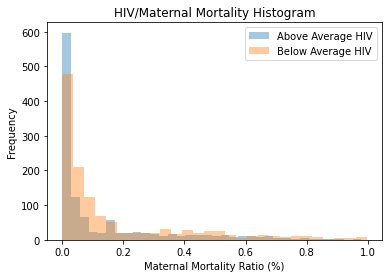

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


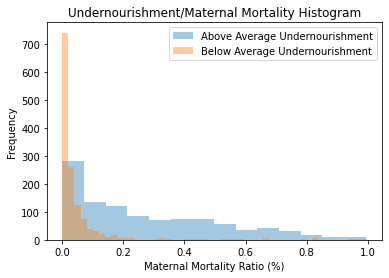

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


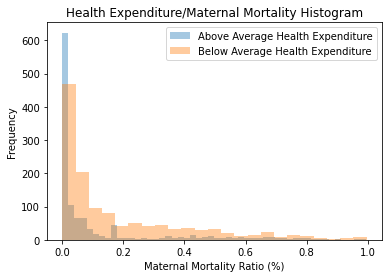

In [ ]:
#VISUALIZING THE DATA

#HIV
hiv_mean = df_with_cart['Prevalence of HIV (%)'].mean()
h_high_rate = df_with_cart.loc[df_with_cart.iloc[:,2]>hiv_mean]
h_low_rate = df_with_cart.loc[df_with_cart.iloc[:,2]<= hiv_mean]

sns.distplot(h_high_rate.iloc[:,9],kde=False,label='Above Average HIV')
sns.distplot(h_low_rate.iloc[:,9],kde=False,label='Below Average HIV')

plt.legend()
plt.title('HIV/Maternal Mortality Histogram')
plt.ylabel('Frequency')
plt.show()

#Undernourishment
nour_mean = df_with_cart['Prevalence of Undernourishment (%)'].mean()
u_high_rate = df_with_cart.loc[df_with_cart.iloc[:,3]>nour_mean]
u_low_rate = df_with_cart.loc[df_with_cart.iloc[:,3]<= nour_mean]

sns.distplot(u_high_rate.iloc[:,9],kde=False,label='Above Average Undernourishment')
sns.distplot(u_low_rate.iloc[:,9],kde=False,label='Below Average Undernourishment')

plt.legend()
plt.title('Undernourishment/Maternal Mortality Histogram')
plt.ylabel('Frequency')
plt.show()

#Health Expenditure
health_mean = df_with_cart['Current health expenditure (% of GDP)'].mean()
h_high_rate = df_with_cart.loc[df_with_cart.iloc[:,4]>health_mean]
h_low_rate = df_with_cart.loc[df_with_cart.iloc[:,4]<= health_mean]

sns.distplot(h_high_rate.iloc[:,9],kde=False,label='Above Average Health Expenditure')
sns.distplot(h_low_rate.iloc[:,9],kde=False,label='Below Average Health Expenditure')

plt.legend()
plt.title('Health Expenditure/Maternal Mortality Histogram')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_with_cart.drop(columns=['Maternal Mortality Ratio (%)'],axis=1),  # all X data
                                                    df_with_cart['Maternal Mortality Ratio (%)'],  # All y data
                                                    test_size=0.4,  # Fraction of data in test set
                                                    shuffle=True,  # Randomly splits the data
                                                    random_state = 3  # Sets random seed for reproducability
                                                    )
print('training:',X_train.shape)
print('testing:', X_test.shape)

training: (1467, 20)
testing: (978, 20)


In [ ]:
#MAKE CORRELATION MATRIX (HEATMAP)

#X_train_corr = X_train.corr()
X_train_corr = df_with_cart.corr()
X_train_corr = X_train_corr['Maternal Mortality Ratio (%)']
print(X_train_corr)

#sns.heatmap(X_train_corr, annot=True )
#plt.show()

# corr = X_train_corr.abs()
# corr = corr[corr > 0.75]
# print(corr.count().sort_values(ascending=False) - 1)

Year                                                                                 -0.078934
Prevalence of HIV (%)                                                                 0.304001
Prevalence of Undernourishment (%)                                                    0.501684
Current health expenditure (% of GDP)                                                -0.164182
Antenatal care coverage - at least four visits (%)                                   -0.535774
Institutional Births (birth taken place in a facility) (%)                           -0.615472
Births attended by skilled health personnel (%)                                      -0.694411
Adolescent birth rate (women aged 15-19) (%)                                          0.650279
Maternal Mortality Ratio (%)                                                          1.000000
Income Code                                                                          -0.669859
Region_East Asia & Pacific                        

# 6. Regression Analysis

## 6.1 Prepare Data for Analysis

>> CREATING CATEGORICAL VERSION OF TARGET FEATURE

In [ ]:
#reorder the columns of the data frame so that maternal mortality is the last column
df_with_cart.head()

,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Adolescent birth rate (women aged 15-19) (%),Maternal Mortality Ratio (%),Income Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition
0,Afghanistan,2003,0.1,40.7,8.941258,16.546154,44.740278,14.000000,15.18,0.001,0,0,0,0,0,0,1,0,1,0,1
1,Afghanistan,2005,0.1,36.2,9.948289,16.100000,44.740278,39.428571,11.74,0.001,0,0,0,0,0,0,1,0,1,0,1
2,Afghanistan,2006,0.1,33.5,10.622766,13.000000,36.000000,39.428571,12.62,0.001,0,0,0,0,0,0,1,0,1,0,1
3,Afghanistan,2007,0.1,30.0,9.904674,13.000000,36.000000,39.428571,10.30,0.001,0,0,0,0,0,0,1,0,1,0,1
4,Afghanistan,2008,0.1,26.4,10.256495,13.533333,37.233333,39.428571,9.00,0.001,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
cart_df = df_with_cart.copy()

In [ ]:
#moving maternal mortality column to the end of the dataframe
cols=list(cart_df.columns)

cols = cols[:8] + cols[10:]
cart_df = cart_df[cols]
cart_df['Maternal Mortality Ratio (%)'] = df_with_cart.iloc[:,9]
cart_df.head()

,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Income Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition,Maternal Mortality Ratio (%)
0,Afghanistan,2003,0.1,40.7,8.941258,16.546154,44.740278,14.000000,0,0,0,0,0,0,1,0,1,0,1,0.001
1,Afghanistan,2005,0.1,36.2,9.948289,16.100000,44.740278,39.428571,0,0,0,0,0,0,1,0,1,0,1,0.001
2,Afghanistan,2006,0.1,33.5,10.622766,13.000000,36.000000,39.428571,0,0,0,0,0,0,1,0,1,0,1,0.001
3,Afghanistan,2007,0.1,30.0,9.904674,13.000000,36.000000,39.428571,0,0,0,0,0,0,1,0,1,0,1,0.001
4,Afghanistan,2008,0.1,26.4,10.256495,13.533333,37.233333,39.428571,0,0,0,0,0,0,1,0,1,0,1,0.001


In [ ]:
cart_df["Maternal Mortality Ratio (%)"].describe()

count    2445.000000
mean        0.149301
std         0.213184
min         0.001000
25%         0.010000
50%         0.046000
75%         0.186000
max         0.996000
Name: Maternal Mortality Ratio (%), dtype: float64

In [ ]:
#split maternal mortality ratio into bins (pandas decides how many bins to have)
cart_df['Maternal Mortality (%) Quartiles'] = pd.qcut(cart_df['Maternal Mortality Ratio (%)'], q=4, precision = 4)

cart_df.head()

,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Income Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition,Maternal Mortality Ratio (%),Maternal Mortality (%) Quartiles
0,Afghanistan,2003,0.1,40.7,8.941258,16.546154,44.740278,14.000000,0,0,0,0,0,0,1,0,1,0,1,0.001,"(0.0009, 0.01]"
1,Afghanistan,2005,0.1,36.2,9.948289,16.100000,44.740278,39.428571,0,0,0,0,0,0,1,0,1,0,1,0.001,"(0.0009, 0.01]"
2,Afghanistan,2006,0.1,33.5,10.622766,13.000000,36.000000,39.428571,0,0,0,0,0,0,1,0,1,0,1,0.001,"(0.0009, 0.01]"
3,Afghanistan,2007,0.1,30.0,9.904674,13.000000,36.000000,39.428571,0,0,0,0,0,0,1,0,1,0,1,0.001,"(0.0009, 0.01]"
4,Afghanistan,2008,0.1,26.4,10.256495,13.533333,37.233333,39.428571,0,0,0,0,0,0,1,0,1,0,1,0.001,"(0.0009, 0.01]"


In [ ]:
#need to change the ranges to be categorical features like 0,1,2,3,4,5
data = cart_df['Maternal Mortality (%) Quartiles'].cat.categories
buckets = pd.Series(data).sort_values
print(buckets)

cart_df['Maternal Mortality (%) Category Code'] = cart_df['Maternal Mortality (%) Quartiles'].cat.codes
cart_df[['Maternal Mortality Ratio (%)','Maternal Mortality (%) Quartiles', 'Maternal Mortality (%) Category Code']].head()

#This works!


<bound method Series.sort_values of 0    (0.0009, 0.01]
1     (0.01, 0.046]
2    (0.046, 0.186]
3    (0.186, 0.996]
dtype: interval>


,Maternal Mortality Ratio (%),Maternal Mortality (%) Quartiles,Maternal Mortality (%) Category Code
0,0.001,"(0.0009, 0.01]",0
1,0.001,"(0.0009, 0.01]",0
2,0.001,"(0.0009, 0.01]",0
3,0.001,"(0.0009, 0.01]",0
4,0.001,"(0.0009, 0.01]",0


In [ ]:
cart_df.columns.size

22

In [ ]:
#This gets rid of the regional data except for sub-saharan africa
df_no_regions = cart_df.drop(columns= cart_df.iloc[:,9:15])
df_no_regions.head()

,Country,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Income Code,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition,Maternal Mortality Ratio (%),Maternal Mortality (%) Quartiles,Maternal Mortality (%) Category Code
0,Afghanistan,2003,0.1,40.7,8.941258,16.546154,44.740278,14.000000,0,0,1,0,1,0.001,"(0.0009, 0.01]",0
1,Afghanistan,2005,0.1,36.2,9.948289,16.100000,44.740278,39.428571,0,0,1,0,1,0.001,"(0.0009, 0.01]",0
2,Afghanistan,2006,0.1,33.5,10.622766,13.000000,36.000000,39.428571,0,0,1,0,1,0.001,"(0.0009, 0.01]",0
3,Afghanistan,2007,0.1,30.0,9.904674,13.000000,36.000000,39.428571,0,0,1,0,1,0.001,"(0.0009, 0.01]",0
4,Afghanistan,2008,0.1,26.4,10.256495,13.533333,37.233333,39.428571,0,0,1,0,1,0.001,"(0.0009, 0.01]",0


## 6.2 Multinomial Logisitic Regression Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_no_regions.drop(columns=['Country','Maternal Mortality Ratio (%)','Maternal Mortality (%) Quartiles', 'Maternal Mortality (%) Category Code'],axis=1),  # all X data
                                                    df_no_regions[ 'Maternal Mortality (%) Category Code'],  # All y data
                                                    test_size=0.4,  # Fraction of data in test set
                                                    shuffle=True,  # Randomly splits the data
                                                    random_state = 3  # Sets random seed for reproducability
)


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(  random_state=1, cv=5, max_iter = 10000, class_weight = 'balanced')
clf.fit(X_train, y_train)

# Predict the number of wins
y_test_predictions = clf.predict(X_test)

# Evaluate models
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')


The train score is 0.738 and the test score is 0.709


In [ ]:
# Get beta coefficients
betas = pd.Series(clf.coef_[0], index=X_train.columns)
# Get intercept, and append it to coefficients
betas = betas.append(pd.Series({"Intercept": clf.intercept_[0]}))
# Print the all betas (including the intercept)
print(betas)


Year                                                                                  0.001312
Prevalence of HIV (%)                                                                 0.089123
Prevalence of Undernourishment (%)                                                    0.002565
Current health expenditure (% of GDP)                                                 0.276527
Antenatal care coverage - at least four visits (%)                                   -0.004109
Institutional Births (birth taken place in a facility) (%)                            0.022585
Births attended by skilled health personnel (%)                                      -0.115497
Income Code                                                                           1.488935
Region_Sub-Saharan Africa                                                             0.939818
Less than 80% Births attended by skilled health personnel Condition                  -0.333150
Less than 5% Adolescent birth rate (women aged 15-

## 6.3 Linear Regression Model

In [ ]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(df_no_regions.drop(columns=['Country', 'Maternal Mortality Ratio (%)','Maternal Mortality (%) Quartiles', 'Maternal Mortality (%) Category Code'],axis=1),  # all X data
                                                    df_no_regions[ 'Maternal Mortality Ratio (%)'],  # All y data
                                                    test_size=0.4,  # Fraction of data in test set
                                                    shuffle=True,  # Randomly splits the data
                                                    random_state = 3  # Sets random seed for reproducability
)

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_lin, y_train_lin)

# Predict the number of wins
y_test_predictions = linreg.predict(X_test_lin)

# Evaluate models
train_score = linreg.score(X_train_lin, y_train_lin)
test_score = linreg.score(X_test_lin, y_test_lin)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

betas = pd.Series(linreg.coef_, index=X_train_lin.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

The train score is 0.700 and the test score is 0.653
Year                                                                                 -0.002155
Prevalence of HIV (%)                                                                 0.003635
Prevalence of Undernourishment (%)                                                   -0.000108
Current health expenditure (% of GDP)                                                 0.000552
Antenatal care coverage - at least four visits (%)                                   -0.000117
Institutional Births (birth taken place in a facility) (%)                            0.001815
Births attended by skilled health personnel (%)                                      -0.000594
Income Code                                                                          -0.027857
Region_Sub-Saharan Africa                                                             0.168926
Less than 80% Births attended by skilled health personnel Condition                   0.1226

## 6.4 Optimizing Model Performance: Scaling and Feature Selection

In [ ]:
from sklearn.preprocessing import StandardScaler
def standardize_data(X_train, X_out_of_sample):
    """Standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard diviation of each feature (i.e., each column) from the X_train
    data is used to standarize both the X_train and X_out_of sample."""

    # Initialize data frame for scaled data
    X_train_standarized = X_train.copy()
    X_out_of_sample_standarized = X_out_of_sample.copy()

    # Define scaling function
    scaler = StandardScaler()

    '''Use scaler to standardize your data. You'll need to fit scaler with your
    training data (use the fit method) and standardize your training and
    out-of-sample data (use the transform method)'''
    # -------------------------------------------------------------------------

    # Scale the X features
    scaler.fit(X_train_standarized)
    #scaler.fit(X_out_of_sample_standarized)

    # Transform the X features
    X_train_standarized.loc[:] = scaler.transform(X_train_standarized)
    X_out_of_sample_standarized.loc[:] = scaler.transform(X_out_of_sample_standarized)

    # -------------------------------------------------------------------------

    return X_train_standarized, X_out_of_sample_standarized, scaler

# Make new data that is scaled"
#X_train_scaled, X_test_scaled, scaler = standardize_data(X_train, X_test)


>> Linear Regression Optimization:

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Standardize the new features
select_features = SelectKBest(f_classif, k=10) #edit the number of k best features based on results
select_features = select_features.fit(X_train_lin, y_train_lin)

# Get mask of columns that have good features
feature_mask = select_features.get_support()
X_train_feature_selection = X_train_lin.iloc[:, feature_mask]
X_test_feature_selection = X_test_lin.iloc[:, feature_mask]


In [ ]:
X_train_scaled_lin, X_test_scaled_lin, scaler_lin = standardize_data(X_train_lin, X_test_lin)
linreg = LinearRegression()
# X_train= X_train.drop(columns='Country')
# X_test = X_test.drop(columns='Country')
linreg.fit(X_train_scaled_lin, y_train)

# Predict the number of wins
y_test_predictions = linreg.predict(X_test_scaled_lin)

# Evaluate models
train_score = linreg.score(X_train_scaled_lin, y_train)
test_score = linreg.score(X_test_scaled_lin, y_test)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

The train score is 0.641 and the test score is 0.576


In [ ]:
linreg_select = LinearRegression()

linreg_select.fit(X_train_feature_selection , y_train)

# Predict the number of wins
y_test_predictions_select = linreg_select.predict(X_test_feature_selection)

# Evaluate models
train_score_select = linreg_select.score(X_train_feature_selection, y_train)
test_score_select = linreg_select.score(X_test_feature_selection, y_test)
print(f'The train score is {train_score_select:.3f} and the test score is {test_score_select:.3f}')

test_lin_betas = pd.Series(linreg_select.coef_, index=X_train_feature_selection.columns)
test_lin_betas = test_lin_betas.append(pd.Series({"Intercept": linreg_select.intercept_}))
print(test_lin_betas)


The train score is 0.610 and the test score is 0.550
Prevalence of HIV (%)                                                                 0.025091
Prevalence of Undernourishment (%)                                                    0.010733
Antenatal care coverage - at least four visits (%)                                    0.000374
Institutional Births (birth taken place in a facility) (%)                           -0.003838
Births attended by skilled health personnel (%)                                       0.017360
Income Code                                                                          -0.339271
Region_Sub-Saharan Africa                                                             0.137845
Less than 80% Births attended by skilled health personnel Condition                   0.849291
Less than 5% Adolescent birth rate (women aged 15-19) Condition                      -0.759701
Less than 67% Institutional Births (birth taken place in a facility) (%) Condition    0.1571

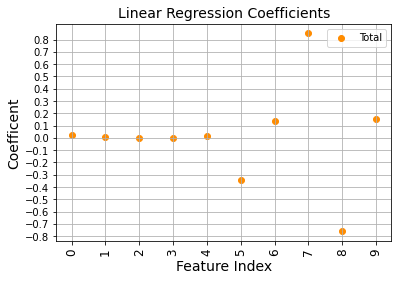

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(10,10))

plt.scatter(range(len(test_lin_betas)-1), test_lin_betas.drop('Intercept'), c= 'darkorange', label='Total')
plt.title('Linear Regression Coefficients', fontsize=14)
plt.ylabel('Coefficent', fontsize=14)
plt.xlabel('Feature Index', fontsize=14)
plt.xticks(np.arange(10), range(len(test_lin_betas) -1), rotation=90, fontsize=12)
plt.yticks(np.arange(start=-0.8, stop = 0.85, step= 0.1))
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

>>Logistic Regression Optimization:

In [ ]:
X_train_scaled, X_test_scaled, scaler = standardize_data(X_train, X_test)

In [ ]:
# Standardize the new features
select_features = SelectKBest(f_classif, k=11) #edit the number of k best features based on results
select_features = select_features.fit(X_train, y_train)

# Get mask of columns that have good features
feature_mask = select_features.get_support()
X_train_feature_selection_log = X_train.iloc[:, feature_mask]
X_test_feature_selection_log = X_test.iloc[:, feature_mask]

In [ ]:
X_train_scaled_fit, X_test_scaled_fit, scaler = standardize_data(X_train_feature_selection_log, X_test_feature_selection_log)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(random_state=1, cv=5, class_weight= 'balanced', max_iter = 10000)
clf.fit(X_train_scaled, y_train)

# Predict the number of wins
y_test_predictions = clf.predict(X_test_scaled)

# Evaluate models
train_score = clf.score(X_train_scaled, y_train)
test_score = clf.score(X_test_scaled, y_test)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')


The train score is 0.742 and the test score is 0.701


In [ ]:
clf = LogisticRegressionCV(random_state=1, cv=5, class_weight= 'balanced', max_iter = 10000)
clf.fit(X_train_feature_selection_log, y_train)

# Predict the number of wins
y_test_predictions = clf.predict(X_test_feature_selection_log)

# Evaluate models
train_score = clf.score(X_train_feature_selection_log, y_train)
test_score = clf.score(X_test_feature_selection_log, y_test)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')


The train score is 0.740 and the test score is 0.709


In [ ]:
clf = LogisticRegressionCV(random_state=1, cv=5, class_weight= 'balanced', max_iter = 10000)
clf.fit(X_train_scaled_fit, y_train)

# Predict the number of wins
y_test_predictions = clf.predict(X_test_scaled_fit)

# Evaluate models
train_score = clf.score(X_train_scaled_fit, y_train)
test_score = clf.score(X_test_scaled_fit, y_test)
print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')


The train score is 0.742 and the test score is 0.714


## 6.5 Optimizing Model Performance: Grid Search

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV


In [ ]:
#LINEAR REGRESSION GRID SEARCH

#RidgeCV(   )
# Dictionary of parameters to search
params_to_search = {
    #'alphas': [(0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0)],
    'normalize': [True, False],
    'gcv_mode' : ['auto', 'svd', 'eigen']
}

# Initialize a model
mdl = RidgeCV()

# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, refit=False, cv=5 )

#scoring = ['neg_mean_squared_error']
# Run the grid search
optimized_dt.fit(X_train_lin, y_train_lin)
optimized_dt.cv_results_
optimized_dt.best_params_
optimized_dt.best_score_

# mean_test_score = optimized_dt.cv_results_["mean_test_score"]

# max_score = 0
# best_model = None

# params = optimized_dt.cv_results_['params']
# for par, score in zip(params, y, x):
#     if rec + pre > max_score:
#         best_model = par
#         max_score = rec + pre

# print('The best model is:')
# print(best_model)
# print(max_score)

#optimized_dt.score(X_train_lin, y_train_lin)
#optimized_dt.score(X_test_lin, y_test_lin)

0.6802170154766333

In [ ]:
# params_to_search = {
#     'penalty': ['l2'],
#     'solver': ['newton-cg', 'sag', 'saga','lbfgs']  ,
#     'max_iter': [10000,20000,30000]  ,
#     'class_weight': ['balanced', None] ,
# }

# # Initialize a model
# mdl = LogisticRegressionCV()
# # Initialize the grid search
# optimized_dt = GridSearchCV(mdl, params_to_search, scoring = ['neg_mean_squared_error'], refit=False, cv=5)
# # Run the grid search
# optimized_dt.fit(X_train, y_train)
# optimized_dt.fit(X_test, y_test)

# 7. Results Analysis

In [ ]:
def df_scores(df, name):

    print("Model Performance for " + name + ':\n')
    print('DF Shape: ', df.shape[0])
    print('DF Distribution: ' , df.groupby('Income Code').size())

    X_train_fun, X_test_fun, y_train_fun, y_test_fun = train_test_split(df.drop(columns=['Country', 'Maternal Mortality Ratio (%)','Maternal Mortality (%) Quartiles', 'Maternal Mortality (%) Category Code'],axis=1),  # all X data
                                                    df[ 'Maternal Mortality Ratio (%)'],  # All y data
                                                    test_size=0.4,  # Fraction of data in test set
                                                    shuffle=True,  # Randomly splits the data
                                                    random_state = 3  # Sets random seed for reproducability
    )

    # #Simple regression:
    # linreg1 = LinearRegression()
    # linreg1.fit(X_train, y_train)
    # linreg1_train_score = linreg1.score(X_train, y_train)
    # linreg1_test_score = linreg1.score(X_test, y_test)
    # print(f'Simple regression: \n The train score is {linreg1_train_score:.3f} and the test score is {linreg1_test_score:.3f}')

    # linreg1_betas = pd.Series(linreg1.coef_, index=X_train.columns)
    # linreg1_betas = betas.append(pd.Series({"Intercept": linreg1.intercept_}))

    #Scaled and Selected regression

    select_features_fun = SelectKBest(f_classif, k=10)
    select_features_fun = select_features_fun.fit(X_train_fun, y_train_fun)
    feature_mask_fun = select_features_fun.get_support()
    X_train_feature_selection_fun = X_train_fun.iloc[:, feature_mask_fun]
    X_test_feature_selection_fun = X_test_fun.iloc[:, feature_mask_fun]

    linreg2_fun = LinearRegression()
    linreg2_fun.fit(X_train_feature_selection_fun, y_train_fun)
    linreg2_train_score_fun = linreg2_fun.score(X_train_feature_selection_fun, y_train_fun)
    linreg2_test_score_fun = linreg2_fun.score(X_test_feature_selection_fun, y_test_fun)
    print(f'Scaled and Selected Regression: \n The train score is {linreg2_train_score_fun:.3f} and the test score is {linreg2_test_score_fun:.3f}\n')

    linreg2_betas_fun = pd.Series(linreg2_fun.coef_, index=X_train_feature_selection_fun.columns)
    linreg2_betas_fun = linreg2_betas_fun.append(pd.Series({"Intercept": linreg2_fun.intercept_}))
    print(linreg2_fun.intercept_)
    print(linreg2_fun.intercept_.shape)
    print(linreg2_betas_fun)
    print('\n')

    return linreg2_betas_fun

## 7.1 Geographical Analysis

In [ ]:
#regions

df_africa = cart_df[cart_df['Region_Sub-Saharan Africa']==1].drop(columns= cart_df.iloc[:,9:15])
df_south_asia = cart_df[cart_df['Region_South Asia']==1].drop(columns= cart_df.iloc[:,9:15])
df_north_america = cart_df[cart_df['Region_North America']==1].drop(columns= cart_df.iloc[:,9:15])
df_middle_east = cart_df[cart_df['Region_Middle East & North Africa']==1].drop(columns= cart_df.iloc[:,9:15])
df_latin_america = cart_df[cart_df['Region_Latin America & Caribbean']==1].drop(columns= cart_df.iloc[:,9:15])
df_europe = cart_df[cart_df['Region_Europe & Central Asia']==1].drop(columns= cart_df.iloc[:,9:15])
df_east_asia = cart_df[cart_df['Region_East Asia & Pacific']==1].drop(columns= cart_df.iloc[:,9:15])

africa_betas = df_scores(df_africa, 'Africa')
south_asia_betas = df_scores(df_south_asia, 'South Asia')
na_betas= df_scores(df_north_america, 'North America')
me_betas= df_scores(df_middle_east, 'Middle East')
latin_betas = df_scores(df_latin_america, 'Latin America')
eu_betas= df_scores(df_europe, 'Europe')
east_asia_betas = df_scores(df_east_asia, 'East Asia')
overall_betas = df_scores(df_no_regions, "Total")


Model Performance for Africa:

DF Shape:  557
DF Distribution:  Income Code
0    263
1    206
2     54
3     34
dtype: int64
Scaled and Selected Regression: 
 The train score is 0.350 and the test score is 0.325

9.678681872072646
()
Year                                                                                 -0.004949
Prevalence of HIV (%)                                                                 0.001899
Prevalence of Undernourishment (%)                                                   -0.001744
Antenatal care coverage - at least four visits (%)                                    0.000290
Institutional Births (birth taken place in a facility) (%)                            0.003836
Births attended by skilled health personnel (%)                                       0.001265
Income Code                                                                          -0.011581
Less than 80% Births attended by skilled health personnel Condition                   0.315820
Less t

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [8] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [8] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 1  2  4  7  8  9 10 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.

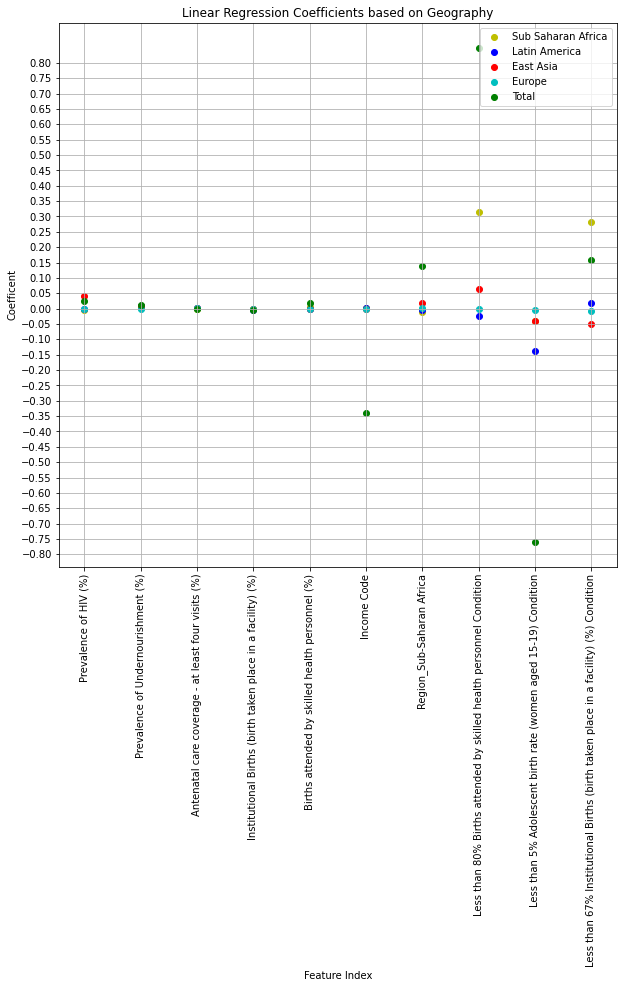

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
plt.scatter(range(len(overall_betas)-1), africa_betas.drop('Intercept'), c= 'y', label='Sub Saharan Africa')
plt.scatter(range(len(overall_betas)-1), latin_betas.drop('Intercept'), c= 'b', label='Latin America')
#plt.show()
plt.scatter(range(len(overall_betas)-1), east_asia_betas.drop('Intercept'), c= 'r', label='East Asia')
plt.scatter(range(len(overall_betas)-1), eu_betas.drop('Intercept'), c= 'c', label='Europe')
#plt.show()
plt.scatter(range(len(overall_betas)-1), test_lin_betas.drop('Intercept'), c= 'g', label='Total')
plt.title('Linear Regression Coefficients based on Geography')
plt.ylabel('Coefficent')
plt.xlabel('Feature Index')
plt.xticks(np.arange(10), overall_betas.index, rotation=90  )
plt.yticks(np.arange(start=-0.8, stop = 0.85, step= 0.05))
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
df_europe.describe()

,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Income Code,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition,Maternal Mortality Ratio (%),Maternal Mortality (%) Category Code
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000
mean,2009.222372,0.848491,3.532608,7.574071,77.799975,92.134068,97.075026,2.524259,0.0,0.002695,0.970350,0.002695,0.014347,0.438005
std,5.043710,0.649541,2.666586,1.963419,12.013506,8.978532,5.368685,0.690267,0.0,0.051882,0.169733,0.051882,0.014684,0.528089
min,2001.000000,0.100000,2.500000,2.686831,49.400000,61.700000,75.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.002000,0.000000
25%,2005.000000,0.100000,2.500000,6.084804,70.389164,80.554042,98.000000,2.000000,0.0,0.000000,1.000000,0.000000,0.006000,0.000000
50%,2009.000000,1.418853,2.500000,7.535956,70.389164,98.400000,99.000000,3.000000,0.0,0.000000,1.000000,0.000000,0.009000,0.000000
75%,2014.000000,1.418853,2.900000,9.065402,88.225000,99.383333,100.000000,3.000000,0.0,0.000000,1.000000,0.000000,0.019000,1.000000
max,2018.000000,1.418853,26.200000,12.346322,100.000000,100.000000,100.000000,3.000000,0.0,1.000000,1.000000,1.000000,0.161177,2.000000


In [ ]:
df_no_regions.describe()

,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Income Code,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition,Maternal Mortality Ratio (%),Maternal Mortality (%) Category Code
count,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000
mean,2009.013497,1.418853,9.843969,6.376778,71.938622,82.856084,84.336136,1.853579,0.227812,0.283845,0.537014,0.170552,0.149301,1.493661
std,4.885872,2.719724,9.403331,2.577028,18.740486,20.202515,21.364034,1.034507,0.419506,0.450955,0.498730,0.376194,0.213184,1.119525
min,2001.000000,0.100000,2.500000,1.025159,6.300000,8.800000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000
25%,2005.000000,0.100000,2.500000,4.398443,66.100000,80.554042,74.714286,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
50%,2009.000000,1.200000,7.500000,6.140826,70.389164,88.700000,97.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.046000,1.000000
75%,2013.000000,1.418853,11.100000,8.251312,86.500000,98.850000,99.571429,3.000000,0.000000,1.000000,1.000000,0.000000,0.186000,2.000000
max,2019.000000,24.100000,67.500000,21.614012,100.000000,100.000000,100.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.996000,3.000000


## 7.2 Income Level Analysis

In [ ]:
#income

df_low_income = cart_df[cart_df['Income Code']==0].drop(columns= cart_df.iloc[:,9:15])
df_low_middle_income = cart_df[cart_df['Income Code']==1].drop(columns= cart_df.iloc[:,9:15])
df_high_middle_income = cart_df[cart_df['Income Code']==2].drop(columns= cart_df.iloc[:,9:15])
df_high_income = cart_df[cart_df['Income Code']==3].drop(columns= cart_df.iloc[:,9:15])

low_betas= df_scores(df_low_income, 'Low Income')
lm_betas = df_scores(df_low_middle_income, 'Low-Middle Income')
mh_betas= df_scores(df_high_middle_income, 'High-Middle Income')
h_betas= df_scores(df_high_income, 'High Income')


Model Performance for Low Income:

DF Shape:  317
DF Distribution:  Income Code
0    317
dtype: int64
Scaled and Selected Regression: 
 The train score is 0.452 and the test score is 0.192

-0.3065873494060636
()
Year                                                                                 -0.000069
Prevalence of HIV (%)                                                                 0.002756
Prevalence of Undernourishment (%)                                                   -0.004882
Antenatal care coverage - at least four visits (%)                                    0.002929
Institutional Births (birth taken place in a facility) (%)                            0.004924
Births attended by skilled health personnel (%)                                      -0.000813
Region_Sub-Saharan Africa                                                            -0.035795
Less than 80% Births attended by skilled health personnel Condition                   0.391112
Less than 5% Adolescent bir

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [7 9] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [7] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [7] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/skle

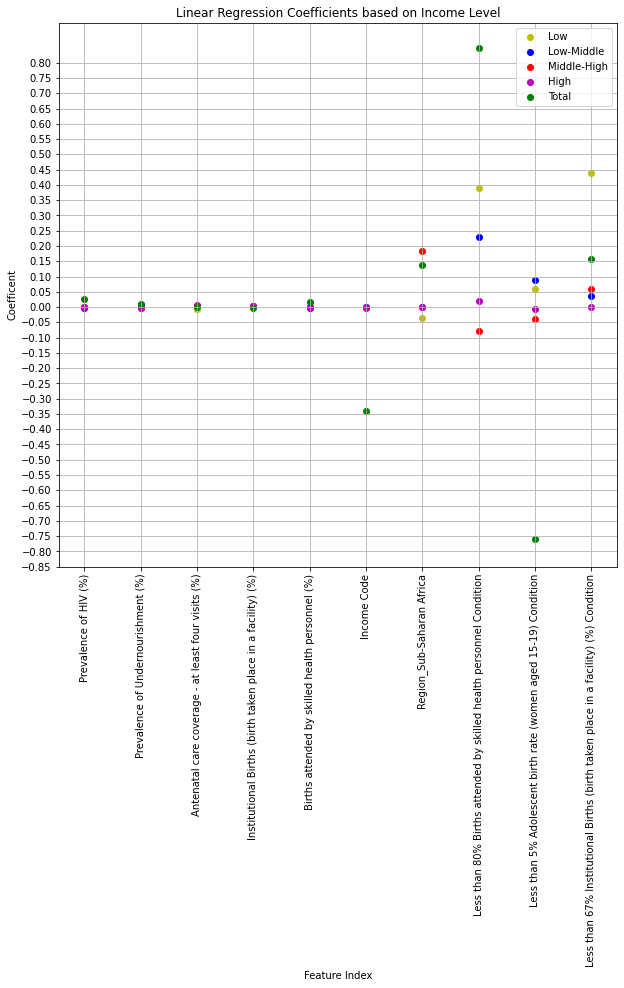

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(overall_betas)-1), low_betas.drop('Intercept'), c= 'y', label='Low')

plt.scatter(range(len(overall_betas)-1), lm_betas.drop('Intercept'), c= 'b', label='Low-Middle')
#plt.show()
plt.scatter(range(len(overall_betas)-1), mh_betas.drop('Intercept'), c= 'r', label='Middle-High')
plt.scatter(range(len(overall_betas)-1), h_betas.drop('Intercept'), c= 'm', label='High')

#plt.show()
plt.scatter(range(len(overall_betas)-1), test_lin_betas.drop('Intercept'), c= 'g', label='Total')
plt.title('Linear Regression Coefficients based on Income Level')
plt.ylabel('Coefficent')
plt.xlabel('Feature Index')
plt.xticks(np.arange(10), overall_betas.index, rotation=90  )
plt.yticks(np.arange(start=-0.85, stop = 0.85, step= 0.05))
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

In [ ]:
cart_df.groupby(by='Income Code')['Maternal Mortality Ratio (%)'].mean()

Income Code
0    0.433492
1    0.278552
2    0.074451
3    0.020139
Name: Maternal Mortality Ratio (%), dtype: float64

In [ ]:
df_high_middle_income.describe()

,Year,Prevalence of HIV (%),Prevalence of Undernourishment (%),Current health expenditure (% of GDP),Antenatal care coverage - at least four visits (%),Institutional Births (birth taken place in a facility) (%),Births attended by skilled health personnel (%),Income Code,Region_Sub-Saharan Africa,Less than 80% Births attended by skilled health personnel Condition,Less than 5% Adolescent birth rate (women aged 15-19) Condition,Less than 67% Institutional Births (birth taken place in a facility) (%) Condition,Maternal Mortality Ratio (%),Maternal Mortality (%) Category Code
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.0,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,2009.005495,1.318160,7.751247,6.286960,81.215392,91.094209,95.209660,2.0,0.074176,0.032967,0.505495,0.039835,0.074451,1.513736
std,4.968675,2.814974,5.922649,2.467482,11.344810,10.604448,7.839945,0.0,0.262237,0.178673,0.500314,0.195706,0.072858,0.765363
min,2001.000000,0.100000,2.500000,1.553575,53.900000,46.100000,31.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.002000,0.000000
25%,2005.000000,0.100000,3.200000,4.707853,70.389164,82.475000,94.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.028000,1.000000
50%,2009.000000,0.300000,5.850000,5.960400,81.000000,96.066667,98.666667,2.0,0.000000,0.000000,1.000000,0.000000,0.048000,2.000000
75%,2013.000000,1.418853,9.854743,7.865970,91.600000,98.844444,99.533333,2.0,0.000000,0.000000,1.000000,0.000000,0.094000,2.000000
max,2019.000000,21.100000,28.300000,21.614012,100.000000,100.000000,100.000000,2.0,1.000000,1.000000,1.000000,1.000000,0.421000,3.000000


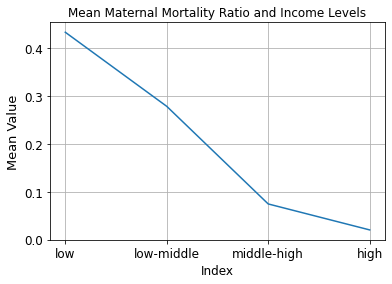

In [ ]:
'''
{ Low Income: 0.433%,
  Low-Middle Income: 0.278%,
  Middle-High income: 0.0744%,
  High Income: 0.0201%}
'''
low_mean = df_low_income['Maternal Mortality Ratio (%)'].mean()
lm_mean = df_low_middle_income['Maternal Mortality Ratio (%)'].mean()
mh_mean = df_high_middle_income['Maternal Mortality Ratio (%)'].mean()
high_mean = df_high_income['Maternal Mortality Ratio (%)'].mean()

means = [low_mean, lm_mean, mh_mean, high_mean]
means_index = ['low', 'low-middle', 'middle-high', 'high']
plt.plot(means_index,means)

plt.title('Mean Maternal Mortality Ratio and Income Levels', fontsize=12)
plt.ylabel('Mean Value',fontsize=13)
plt.xlabel('Index', fontsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.grid(True)
# Show the plot
plt.show()

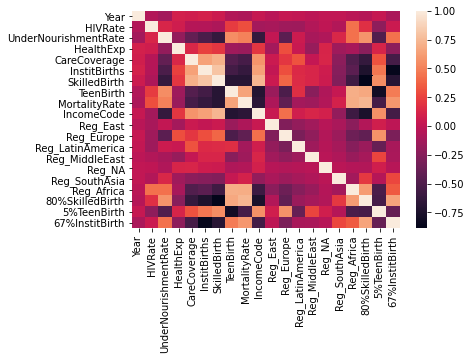

In [ ]:
df_with_cart.columns=['Country','Year','HIVRate','UnderNourishmentRate','HealthExp','CareCoverage','InstitBirths','SkilledBirth','TeenBirth','MortalityRate','IncomeCode','Reg_East','Reg_Europe','Reg_LatinAmerica','Reg_MiddleEast','Reg_NA','Reg_SouthAsia','Reg_Africa','80%SkilledBirth','5%TeenBirth','67%InstitBirth']

corr = df_with_cart.corr()

sns.heatmap(corr,annot=False)
plt.show()